# **KOBE BRYANT, LOS ANGELES LAKERS ANALYSIS**
**Author**: Team Mamba  
**Course**: IST 718  
**Section**: 2020-0108  
**Due Date**: Mar. 14, 2020  
  


## INTRODUCTION

<p align = 'justify'><font size="2.5" face="verdana"><br><sup>1</sup>The NBA began life as the Basketball Association of America in 1946 and played under monkier for 3 years before, in 1949, merging with the National Basketball League and changing names to the NBA. The NBA has always been a league that was dominated by what some historians have called "teams of the era".             <sup>2</sup>The new NBA was made up of 17 teams that represented both small towns and large cities across the country. Through the 1950s, though, the number of teams dwindled, along with fan support, and by the 1954-55 season, only eight teams remained. That year, the league transformed the game with the creation of the 24-second clock, making play faster-paced and more fun to watch. Fans returned, and the league, now financially solvent, expanded throughout the 1960s and 70s. Today, the NBA attracts players—and millions of fans—from countries around the world. </br></p>
	

<p align = 'justify'><font size="2.5" face="verdana"><br><sup>3</sup>The National Basketball Association has a reputation for being the most innovative of the major professional North American sports leagues, earning money from a combination of television rights, merchandising, ticket sales, and more.  It was the first league to turn its all-star game into a three-day weekend loaded with events, the first to draw a significant portion of its revenues through merchandising, and the first to consciously develop its most marketable players into global media superstars. Fore example:- Kobe Bryant, Lebron James and Michael Jordan.<sup>4</sup>Innovate or die is a phrase often echoed  in the marketing world. No matter how large your brand is, if you are not proactively thinking about how to stay ahead, your company is destined to get left behind. Even brands as large as the NBA are not immune to this concept, which why under Commissioner Adam Silver, the league has undergone significant changes to remain on the cutting edge of the sports world. From unparalleled access to players and coaches rethinking  their content strategy, the NBA has kept basketball interesting and even expanded its reach and audience.</br></p> 

<p align = 'justify'><font size="2.5" face="verdana"><br>One way the NBA has been reinventing itself is through the use of Data and Analytics. The League runs yearly hackathons which allows them to get some new great ideas with teams like the "Golden State Warriors" crediting their success to their analyst. Data can be used to show when players need rest - there by allowing their coaches to rest their players at the right time, this not only helps prevent injuries but also allows players to play longer. <sup>5</sup>In 2009 the league began using a state of the art video system to track the players movement on the court as well as the ball. Having this new video system allowed the NBA to collect new data which in term allowed data scientists to use machine learning and cartography ( the science or practice of drawing maps) to better assess which players helped their team to win. Data can be used to find hidden insights and patterns to benefit a team.

<p align = 'justify'><font size="2.5" face="verdana">The main aim of the analysis in this project going forward is to determine if:-
 

*   There is a correlation between Kobe Bryant's performance, ticket sales and Revenue of the LA Lakers NBA team
*   Kobe Bryant's swishes/misses can be predicted using Machine Learning Techniques

<p align = 'justify'><font size="2.5" face="verdana"> Key findings:-


*   93% of the Dunk shots attempted by Kobe were successful while only 39% of the Jump shots were succesfful. Majority of the attempts he made were jump shots.
*   Kobe appeared to have a stronger offensive wins shares rate than defensive win shares rate.
*   Average attendance is slightly negatively correlated with team blocks and slightly positively correlated with Kobe's games played.
*   Team wins fell off sharply toward the end of Kobe's career when he became injured more often.
*   At it's peak, Kobe created a surplus of $3.0M during the 2000-2001 season, coincidentally winning the NBA Championship that season.
*   Kobe's measures are generally more polarizing than team performance - When Kobe plays more minutes and has a strong defensive plus/minus, the team appears to win more (relative to offensive plus/minus).
*  When predicting wether Kobe will make a shot or not - sec_min_transformed, shot_distance and home_play were the top 3 features with the highest feature importance using the Random Forest. However, using the top 13 features did not improve the model performance. The model with the highest accuracy was the Linear Discriminant Analysis with a train accuracy of 68.15% and a test accuracy of 68.09%







1.	https://nbahoopsonline.com/History/
2.	https://www.history.com/this-day-in-history/nba-is-born
3.	https://www.investopedia.com/articles/personal-finance/071415/how-nba-makes-money.asp
4. https://www.mediafrenzyglobal.com/how-the-nba-revitalized-its-marketing-strategy/
5. https://medium.com/@randerson112358/how-the-nba-uses-data-analytics-6eac3c43a096

---
## PART 1: KOBE BRYANT EXPLORATORY ANALYSIS & SHOT MODELING
--- 

    Loading the Original NBA dataset from Kaggle, there are 30,697 observations and 25 features. 
    Each of the observations represents a shot taken by Kobe Bryant over the data collection period


In [0]:
# importing all required libraries
import pandas as pd
import seaborn as sns 
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pyplot
%matplotlib inline
import statsmodels.formula.api as smf # linear regression --> Rsquared
from sklearn.naive_bayes import MultinomialNB,GaussianNB
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC,SVC
from sklearn.model_selection import KFold, StratifiedKFold, cross_val_score, GridSearchCV, train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.feature_selection import SelectFromModel
from sklearn.pipeline import Pipeline
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
random_state =  0

print('Done')

Done


In [0]:
NBA_orig = pd.read_csv("/content/drive/Shared drives/IST718_KobeBryantProject/NBAOriginalData_Hana/data.csv")

In [0]:
print("dimenssions =",NBA_orig.shape)
print("total number of shots =",len(NBA_orig))
NBA_orig.head(2)

dimenssions = (30697, 25)
total number of shots = 30697


,action_type,combined_shot_type,game_event_id,game_id,lat,loc_x,loc_y,lon,minutes_remaining,period,playoffs,season,seconds_remaining,shot_distance,shot_made_flag,shot_type,shot_zone_area,shot_zone_basic,shot_zone_range,team_id,team_name,game_date,matchup,opponent,shot_id
0,Jump Shot,Jump Shot,10,20000012,33.9723,167,72,-118.1028,10,1,0,2000-01,27,18,NaN,2PT Field Goal,Right Side(R),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,1
1,Jump Shot,Jump Shot,12,20000012,34.0443,-157,0,-118.4268,10,1,0,2000-01,22,15,0.0,2PT Field Goal,Left Side(L),Mid-Range,8-16 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,2


In [0]:
# removing nulls from the df
NBA_orig = NBA_orig[NBA_orig['shot_made_flag'].isnull()==False] 

print("total number of labeled shots = ",len(NBA_orig))

total number of labeled shots =  25697


#### EXPLORATORY DATA ANALYSIS



In [0]:
# when did the seasons happen?
print(NBA_orig['game_date'].value_counts()) #1996 - 2015

# over what period was this data collected?
# converting the game date to a date time variable for future analysis
NBA_orig['game_date'] = NBA_orig['game_date'] .astype('datetime64[ns]')

2016-04-13    43
2007-03-30    41
2002-11-07    39
2006-01-22    39
2008-01-14    37
              ..
1996-11-19     1
1996-11-03     1
1996-12-10     1
2005-01-13     1
1997-02-21     1
Name: game_date, Length: 1558, dtype: int64


In [0]:
date_grouped = NBA_orig['game_date'].groupby([NBA_orig['game_date'].dt.date]).count().reset_index(name = 'Count')
date_grouped['game_date'] = date_grouped['game_date'] .astype('datetime64[ns]')
print(date_grouped.dtypes)
date_grouped.head(2)

game_date    datetime64[ns]
Count                 int64
dtype: object


,game_date,Count
0,1996-11-03,1
1,1996-11-05,1


In [0]:
# grouping the date field at a month level/Year level in order to plot
# would be good to find out when he retired from playing? = 2016 april
per = date_grouped.game_date.dt.to_period("Y")
date_grouped = date_grouped.groupby(per)
date_grouped = date_grouped.sum()

# date_grouped = date_grouped.reset_index()
date_grouped.head()

,Count
game_date,
1996,69
1997,625
1998,499
1999,983
2000,1716


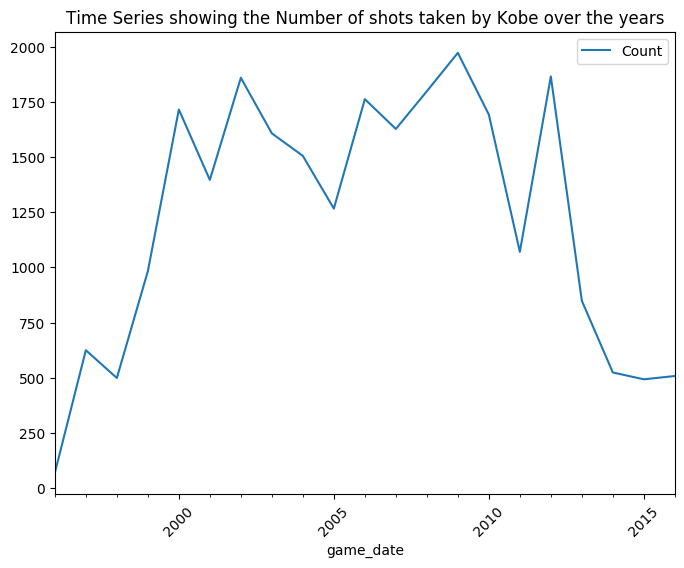

In [0]:
plt.style.use('fivethirtyeight')
plt.rcParams.update(plt.rcParamsDefault)
pd.plotting.register_matplotlib_converters()


date_grouped.plot(figsize=(8,6))
plt.xticks(rotation=45)
title = plt.title('Time Series showing the Number of shots taken by Kobe over the years')
plt.show()

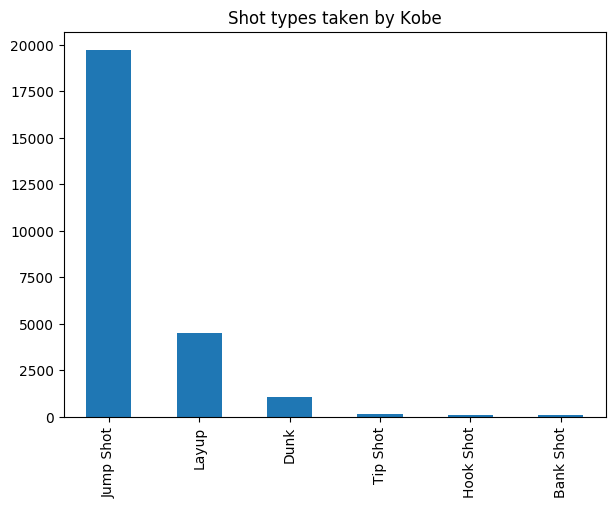

In [0]:
# Interpretation:: majority of the shot types taken by Kobe were jump shots
# NBA_orig['combined_shot_type'].value_counts()
NBA_orig['combined_shot_type'].value_counts().plot(kind = 'bar',figsize=(7,5))
title = plt.title('Shot types taken by Kobe')

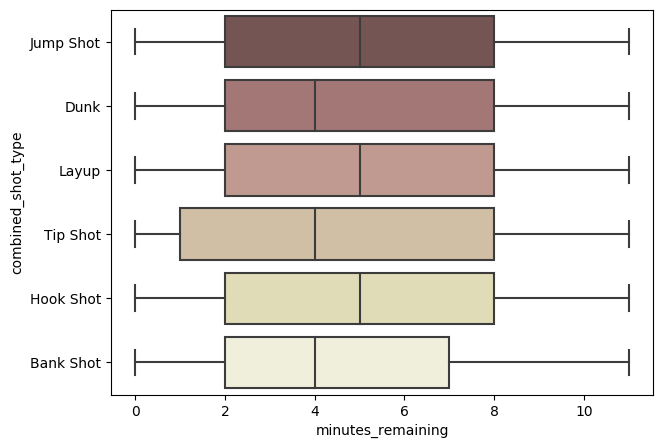

In [0]:
# Interpretation:: Kobe tends to take the different kinds of shots at an average of between 4 and 5 minutes remaining. The tip shot has the hishest distribution

plt.figure(figsize=(7,5))
sns.boxplot(y="combined_shot_type", x="minutes_remaining", data=NBA_orig, palette = 'pink')

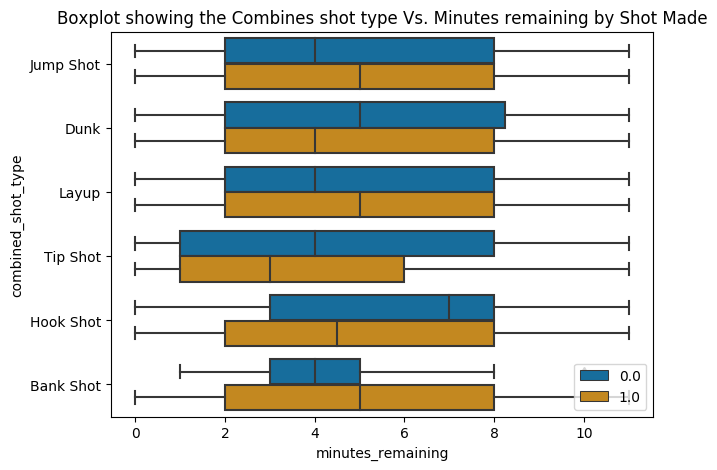

In [0]:
# Interpretation:: 
plt.figure(figsize=(7,5))
sns.boxplot(x = 'minutes_remaining'
            , y = 'combined_shot_type'
            , hue = 'shot_made_flag'
            , data = NBA_orig
            , palette="colorblind"
           ).set_title("Boxplot showing the Combines shot type Vs. Minutes remaining by Shot Made")

plt.legend(loc='lower right')
plt.show()

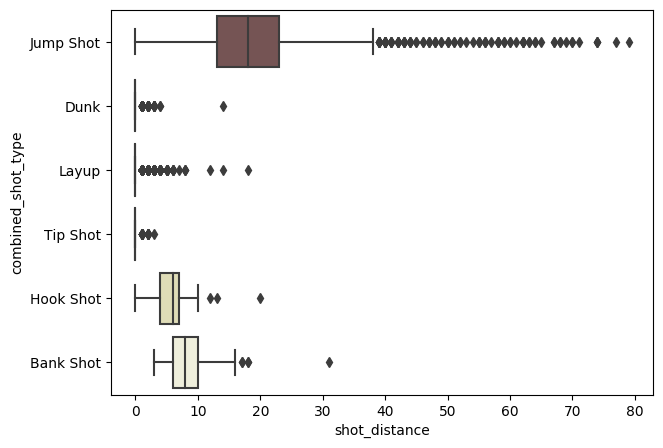

In [0]:
# Interpretation:: Kobe tends to take the different kinds of shots at an average of between 4 and 5 minutes remaining. The tip shot has the hishest distribution
plt.figure(figsize=(7,5))
sns.boxplot(y="combined_shot_type", x="shot_distance", data=NBA_orig, palette = 'pink')

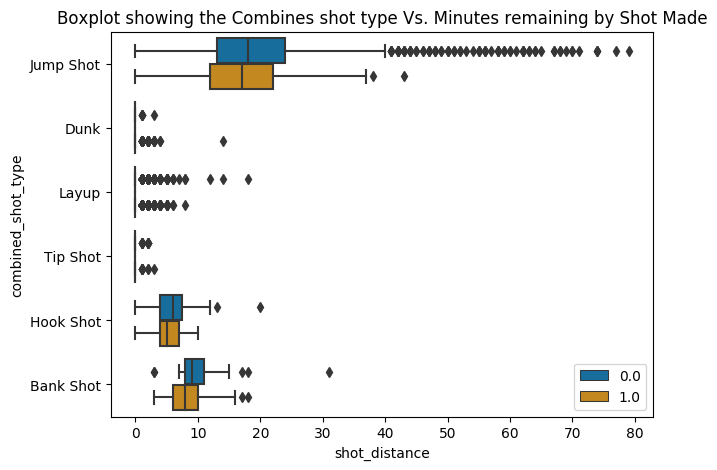

In [0]:
# Interpretation:: 
plt.figure(figsize=(7,5))
sns.boxplot(x = 'shot_distance'
            , y = 'combined_shot_type'
            , hue = 'shot_made_flag'
            , data = NBA_orig
            , palette = "colorblind"
           ).set_title("Boxplot showing the Combines shot type Vs. Minutes remaining by Shot Made")

plt.legend(loc='lower right')
plt.show()

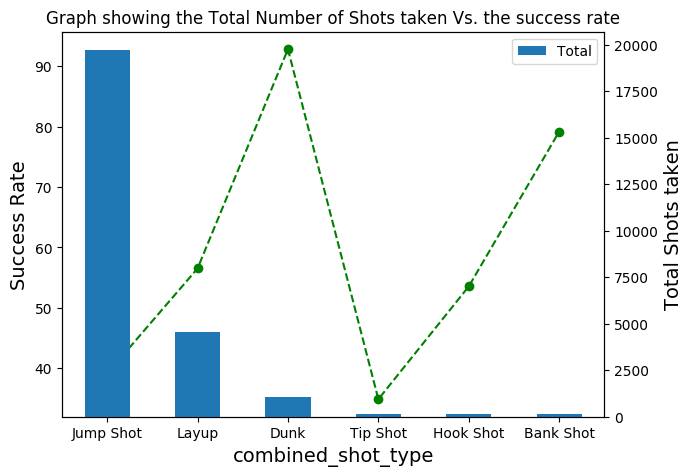

In [0]:
# Interpretation: Regardless of the fact that majority of the shots taken by kobe were jump shots, only 39% of these were successful
# only 34% of the tip shots were successful shots and 93% of the dunks were successful shots
NBA_orig = NBA_orig[NBA_orig.shot_made_flag.isnull()==False]
action_type = NBA_orig[['action_type','combined_shot_type','shot_made_flag']]
action_type.loc[action_type['shot_made_flag'] == 1, 'shot_made_flag'] = 'Success'  
action_type.loc[action_type['shot_made_flag'] == 0, 'shot_made_flag'] = 'Fail'
action_type['Count'] = 1
action_type = action_type.groupby(['combined_shot_type','shot_made_flag'])['Count'].sum().unstack(fill_value=0)
action_type.columns.name = None
action_type = action_type.reset_index()
action_type['Total'] = action_type['Fail'] + action_type['Success']
action_type['%_Success'] = (action_type['Success']/action_type['Total'])*100
action_type = action_type.sort_values('Total',ascending=False)
action_type.head()

fig,ax = plt.subplots(figsize=(7,5))
ax.plot(action_type['combined_shot_type'],  action_type['%_Success'], color="green", linestyle='dashed',marker = "o")
ax.set_xlabel("combined_shot_type",fontsize=14)
ax.set_ylabel("Success Rate",fontsize=14)
ax2 = ax.twinx()
action_type[[ 'combined_shot_type','Total']].plot(x='combined_shot_type', kind='bar',ax=ax2)
ax2.set_ylabel("Total Shots taken",fontsize=14)
plt.title('Graph showing the Total Number of Shots taken Vs. the success rate')
plt.show()

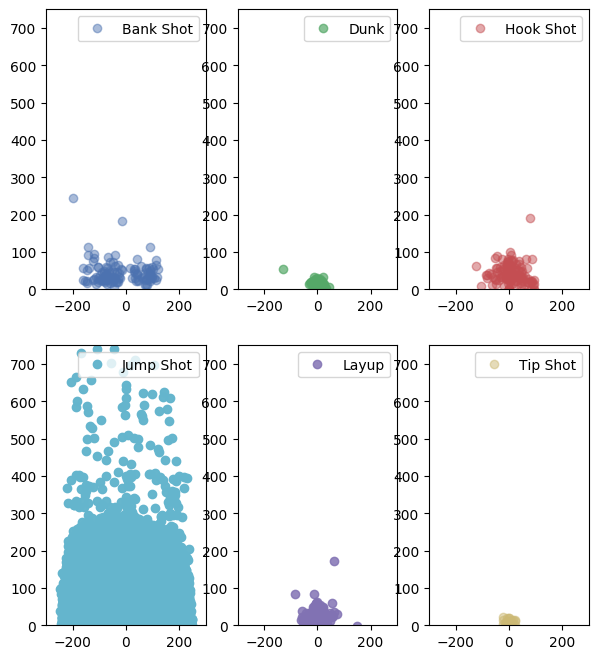

In [0]:


# combined shot types
groups = NBA_orig.groupby('combined_shot_type')
court_scale = 14
alphas = []
colors = ['b', 'g', 'r', 'c', 'm', 'y']

for u in [i[0] for i in groups]:
    d = len(NBA_orig.loc[NBA_orig.combined_shot_type == u, 'combined_shot_type'])
    alphas.append(np.log1p(d) / 10)

# fig, ax = plt.subplots(2, 3, figsize=(court_scale, court_scale*(18/15)))
fig, ax = plt.subplots(2, 3, figsize=(7, 8))

for i, ((name, group), alp, col) in enumerate(zip(groups, alphas, colors)):
    x = i//3
    y = i%3
    ax[x, y].set_autoscale_on(False)
    ax[x, y].margins(0.05) # Optional, just adds 5% padding to the autoscaling
    ax[x, y].axis([-300,300,0,750])
    ax[x, y].plot(group.loc_x, group.loc_y, marker='.', linestyle='', ms=12, label=name, alpha=alp, color=col)
    ax[x, y].legend()



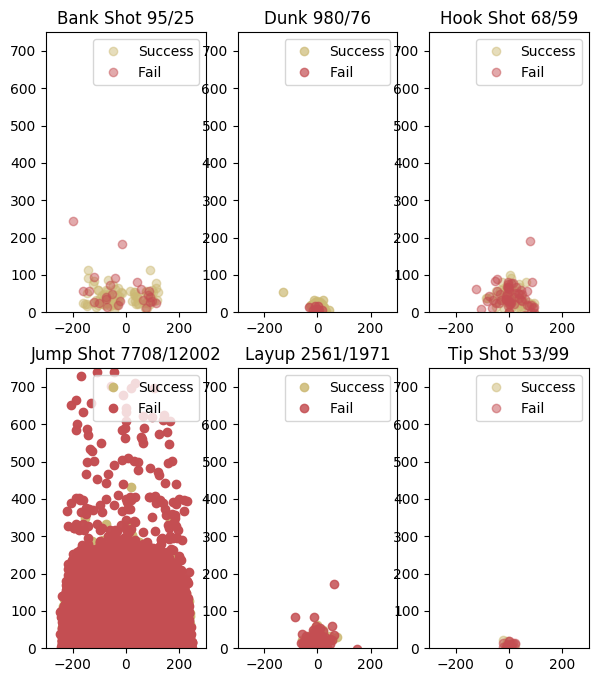

In [0]:

# combined shot types
groups = NBA_orig.groupby('combined_shot_type')
court_scale = 14
alphas = []
colors = ['b', 'g', 'r', 'c', 'm', 'y']

for u in [i[0] for i in groups]:
    d = len(NBA_orig.loc[NBA_orig.combined_shot_type == u, 'combined_shot_type'])
    alphas.append(np.log1p(d)/10)

# 28 : 15
# fig, ax = plt.subplots(2, 3, figsize=(court_scale, court_scale*(18/15)))
fig, ax = plt.subplots(2, 3, figsize=(7, 8))

for i, ((name, group), alp, col) in enumerate(zip(groups, alphas, colors)):
    # plot 
    x = i//3
    y = i%3
    
    #parameter setting
    ax[x, y].set_autoscale_on(False)
    ax[x, y].margins(0.05) # Optional, just adds 5% padding to the autoscaling
    ax[x, y].axis([-300,300,0,750])
    
   
    ax[x, y].plot(group[group.shot_made_flag == 1].loc_x, group[group.shot_made_flag == 1].loc_y, marker='.', 
                                                                                linestyle='', ms=12, label='Success', alpha=alp, color='y')
    ax[x, y].plot(group[group.shot_made_flag != 1].loc_x, group[group.shot_made_flag != 1].loc_y, marker='.', 
                                                                                linestyle='', ms=12, label='Fail', alpha=alp, color='r')
    ax[x, y].legend()
    
    # title 
    score =  ' ' + str(len(group[group.shot_made_flag == 1])) + '/' +str(len(group[group.shot_made_flag != 1]))
    ax[x, y].title.set_text(name + score) 




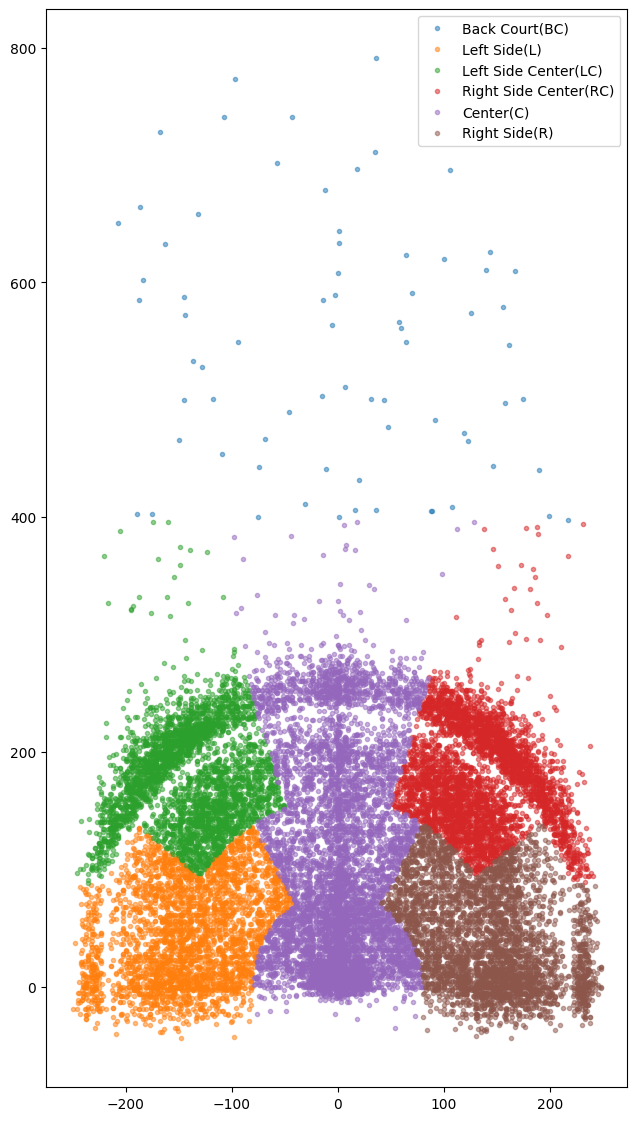

In [0]:
plt.figure(figsize=(7.5,14))

for zone in set(NBA_orig.shot_zone_area):
    plt.plot(NBA_orig[NBA_orig.shot_zone_area == zone].loc_x, NBA_orig[NBA_orig.shot_zone_area == zone].loc_y, marker='.', linestyle='', alpha = 0.5, label=zone)
    plt.plot(figsize=(6, 5))
    plt.legend()

In [0]:
def group_sf(NBA_orig, category):
    # combined shot types
    groups = NBA_orig.groupby(category)
    n = len(set(NBA_orig[category]))
    k = (n+1)//2
    #28 : 15
    fig, ax = plt.subplots(2, k, figsize=(court_scale, court_scale*(20/15)))

    for i, (name, group) in enumerate(groups):
        x = i//k
        y = i%k
        ax[x, y].set_autoscale_on(False)
        ax[x, y].margins(0.05) # Optional, just adds 5% padding to the autoscaling
        ax[x, y].axis([-300,300,0,750])

        
        ax[x, y].plot(group[group.shot_made_flag == 1].loc_x, group[group.shot_made_flag == 1].loc_y, marker='.', 
                                                                                    linestyle='', ms=12, label='Success', alpha=0.5, color='b')
        ax[x, y].plot(group[group.shot_made_flag != 1].loc_x, group[group.shot_made_flag != 1].loc_y, marker='.', 
                                                                                    linestyle='', ms=12, label='Fail', alpha=0.5, color='r')
        ax[x, y].legend()
        # title 
        score =  ' ' + str(len(group[group.shot_made_flag == 1])) + '/' +str(len(group[group.shot_made_flag != 1]))
        ax[x, y].title.set_text(name + score) 

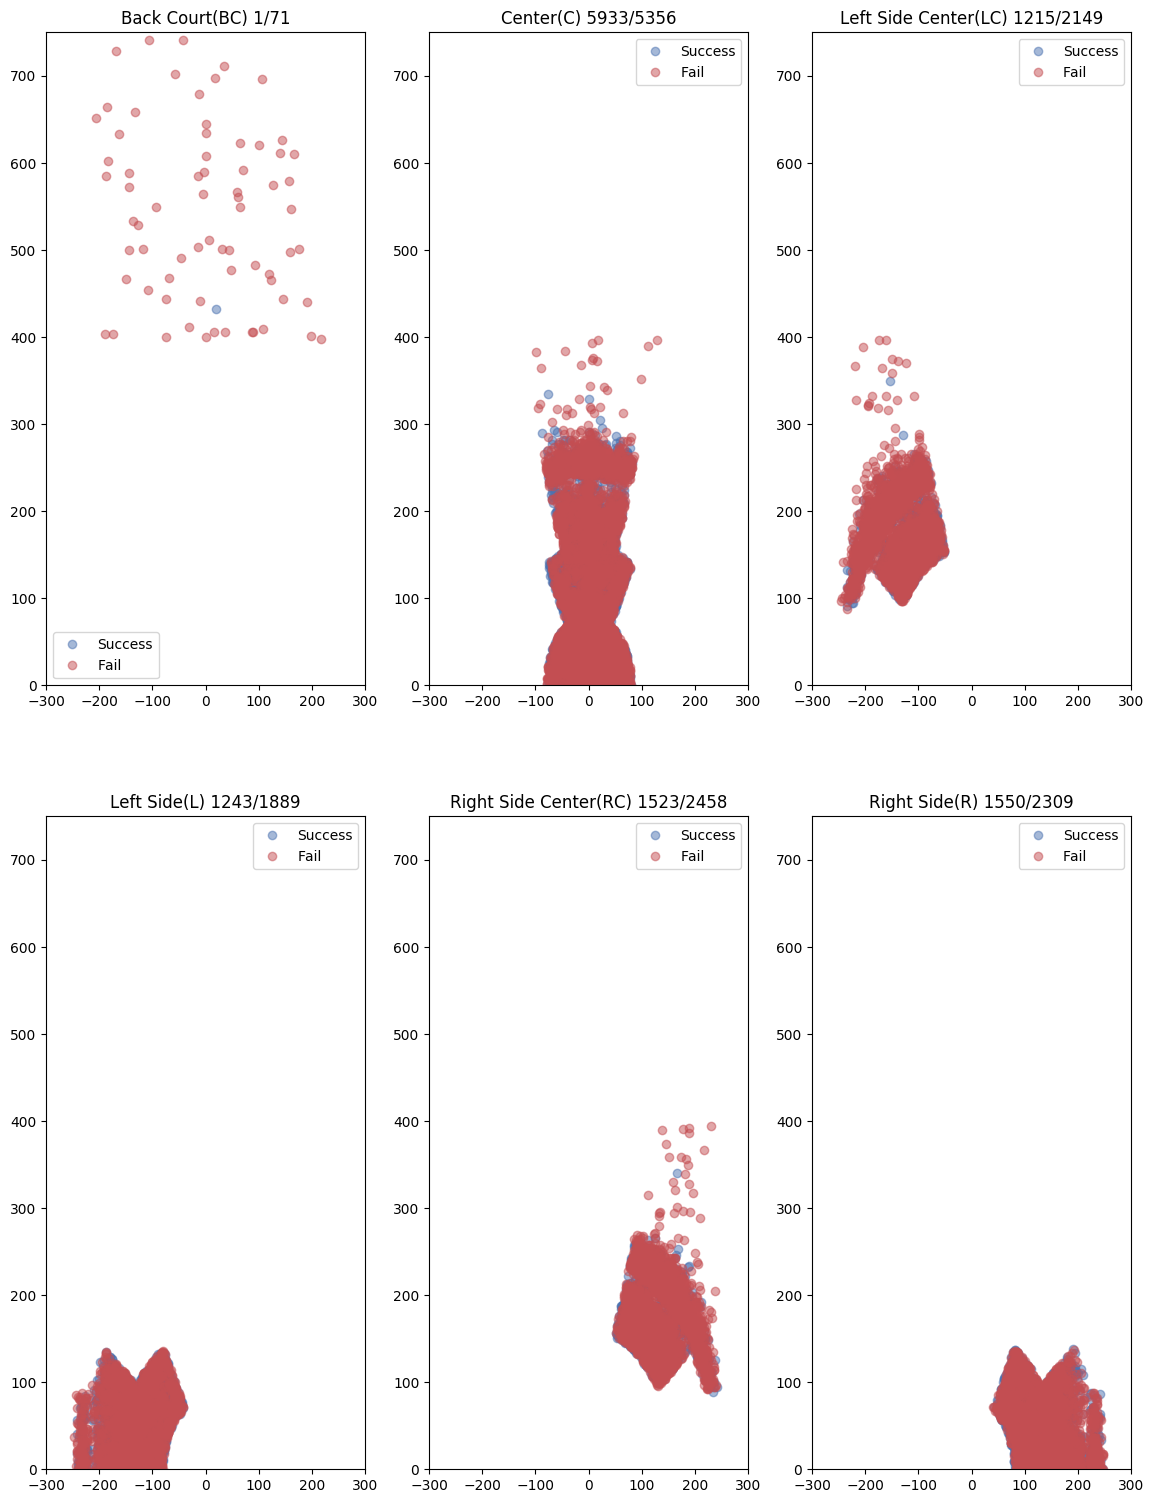

In [0]:
group_sf(NBA_orig,'shot_zone_area')

#### MODEL BUILDING
 <p align = 'justify'><font size="2.5" face="verdana"> Prediciting whether Kobe will make a shot/not
 
      1. Feature Selection
      2. Splitting the dataset into train and test data sets
      3. Applying ML algorithms


*  <p align = 'justify'><font size="2.5" face="verdana">We notice that lat and loc_y have a perfect negative correlation
*  <p align = 'justify'><font size="2.5" face="verdana">lon and loc_x have a perfect +ve correlation
*  <p align = 'justify'><font size="2.5" face="verdana">shot distance is also correlated to lat and loc_y as well with a strength of -0.82 and +0.82 respectively





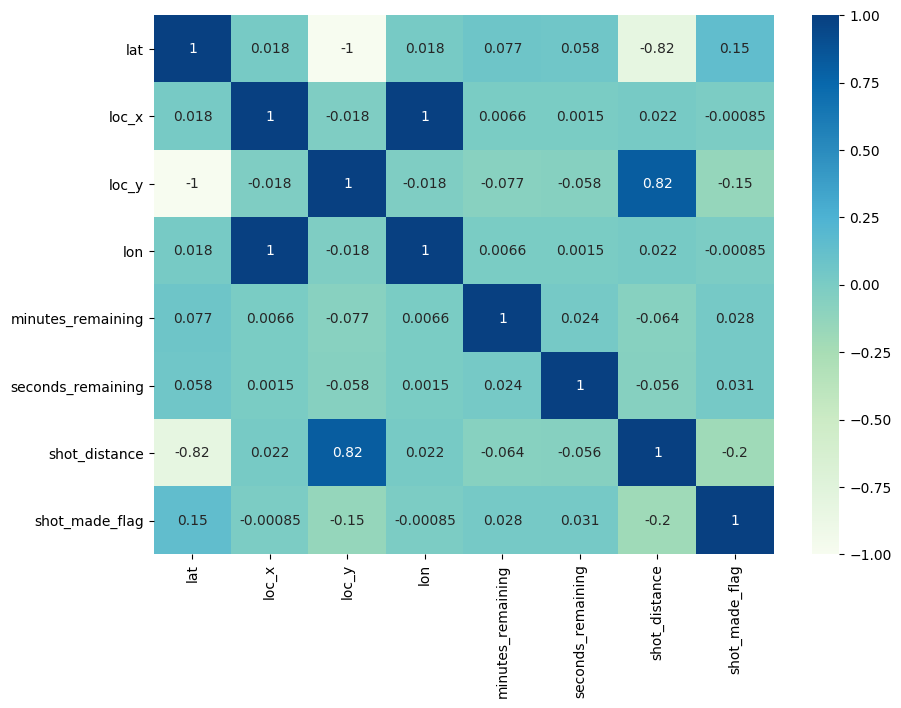

In [0]:
# # NBA_orig.head(2).T
# Feature selection using Correlation
# Removing highly correlated features

NBA_numerics = NBA_orig.loc[:,['lat','loc_x','loc_y','lon','minutes_remaining','seconds_remaining','shot_distance','shot_made_flag']]
plt.figure(figsize=(10,7))
cor = NBA_numerics.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.GnBu)
plt.show()

* <p align = 'justify'><font size="2.5" face="verdana"> since shot_distance is negatively correlated to loc_y with a strength of -0.82 and positively correlated to lat (0.82)
*  <p align = 'justify'><font size="2.5" face="verdana">lets see how much variance in shot_distance is explained by lat and loc_y
*  <p align = 'justify'><font size="2.5" face="verdana">loc_y and lat explain 66.9% of the variance in shot_distance

In [0]:

check_model = str('shot_distance ~ lat + loc_y')
check_model_fit = smf.ols(check_model, data = NBA_numerics).fit()
print(check_model_fit.summary())

                            OLS Regression Results                            
Dep. Variable:          shot_distance   R-squared:                       0.669
Model:                            OLS   Adj. R-squared:                  0.669
Method:                 Least Squares   F-statistic:                 5.201e+04
Date:                Thu, 05 Mar 2020   Prob (F-statistic):               0.00
Time:                        02:34:50   Log-Likelihood:                -79792.
No. Observations:               25697   AIC:                         1.596e+05
Df Residuals:                   25695   BIC:                         1.596e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0047   4.18e-05    113.649      0.0

<p align = 'justify'><font size="2.5" face="verdana"> NB:

* <p align = 'justify'><font size="2.5" face="verdana">loc_x and lon have a perfect correlation
* <p align = 'justify'><font size="2.5" face="verdana">lon explains 100% of the variance in loloc_x and vise versa

In [0]:
# i believe we can remove both lon and lat since they both have perfect correlations with loc_x and loc_y
check_model = str('loc_x ~ lon')
check_model_fit = smf.ols(check_model, data = NBA_numerics).fit()
print(check_model_fit.summary())

                            OLS Regression Results                            
Dep. Variable:                  loc_x   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.381e+30
Date:                Thu, 05 Mar 2020   Prob (F-statistic):               0.00
Time:                        02:34:54   Log-Likelihood:             6.0396e+05
No. Observations:               25697   AIC:                        -1.208e+06
Df Residuals:                   25695   BIC:                        -1.208e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.183e+05   1.01e-10   1.18e+15      0.0

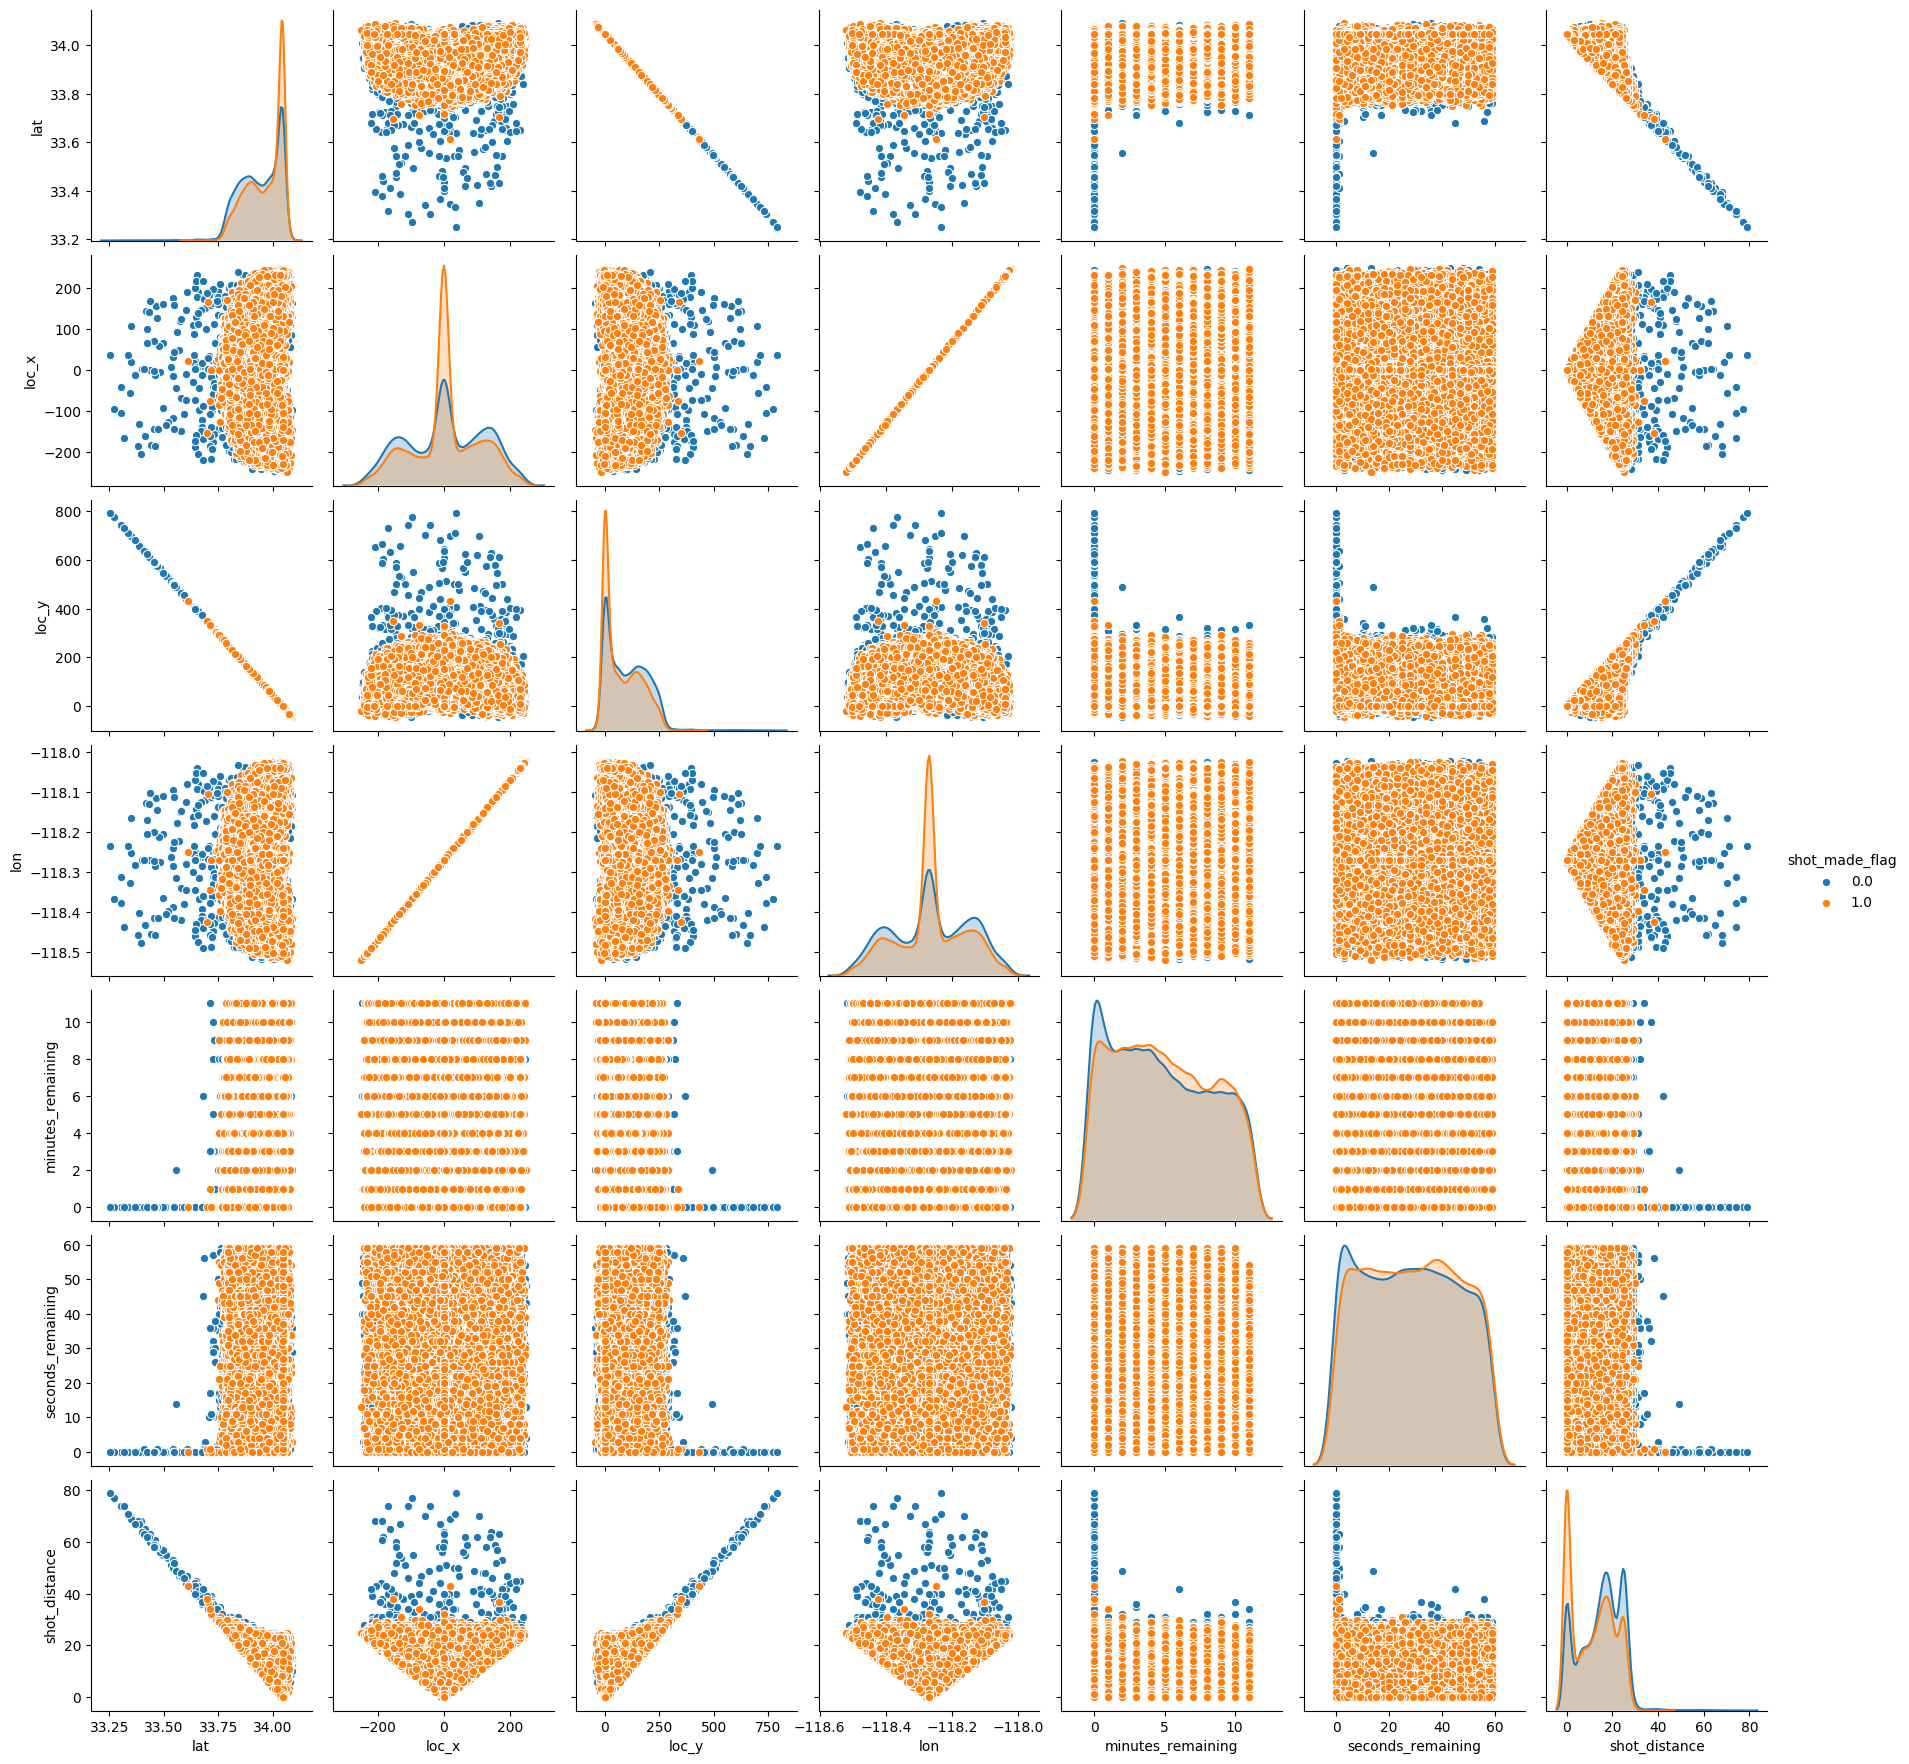

In [0]:
# using shot_made_flag as hue, the correlation plot below shows the correlations between the numeric features in the dataset
sns_plot = sns.pairplot(NBA_numerics,hue = 'shot_made_flag')
# sns_plot.savefig("pairplot.png")

In [0]:
# NBA_orig.head(2).T
# transforming the minutes remaining and seconds remaining features
NBA_orig['sec_min_transformed'] = 60 * NBA_orig['minutes_remaining'] * NBA_orig['seconds_remaining']
# NBA_orig['last_5_sec_in_period'] = NBA_orig['sec_min_transformed'] < 5 # not sure of the interpretation of this feature?

## Matchup - (away/home)
NBA_orig['home_play'] = NBA_orig['matchup'].str.contains('vs').astype('int')

# Game date
NBA_orig['game_date'] = pd.to_datetime(NBA_orig['game_date'])
NBA_orig['game_year'] = NBA_orig['game_date'].dt.year
NBA_orig['game_month'] = NBA_orig['game_date'].dt.month

# Loc_x, and loc_y binning
NBA_orig['loc_x'] = pd.cut(NBA_orig['loc_x'], 25)
NBA_orig['loc_y'] = pd.cut(NBA_orig['loc_y'], 25)

# Replace 20 least common action types with value 'Other'
rare_action_types = NBA_orig['action_type'].value_counts().sort_values().index.values[:20]
NBA_orig.loc[NBA_orig['action_type'].isin(rare_action_types), 'action_type'] = 'Other'

# NBA_orig['game_month'].value_counts()
# NBA_orig['action_type'].value_counts()
# NBA_orig['opponent'].value_counts()

# # dropping some of the features - based on correlation
NBA_model = NBA_orig.loc[:,['shot_made_flag','action_type','combined_shot_type','loc_x','loc_y','sec_min_transformed','shot_distance','shot_type','shot_zone_area','shot_zone_basic','home_play','game_month']]
NBA_model.head(2)

,shot_made_flag,action_type,combined_shot_type,loc_x,loc_y,sec_min_transformed,shot_distance,shot_type,shot_zone_area,shot_zone_basic,home_play,game_month
1,0.0,Jump Shot,Jump Shot,"(-170.32, -150.4]","(-10.6, 22.8]",13200,15,2PT Field Goal,Left Side(L),Mid-Range,0,10
2,1.0,Jump Shot,Jump Shot,"(-110.56, -90.64]","(123.0, 156.4]",18900,16,2PT Field Goal,Left Side Center(LC),Mid-Range,0,10


In [0]:
NBA_model.describe()

,shot_made_flag,sec_min_transformed,shot_distance,home_play,game_month
count,25697.000000,25697.000000,25697.000000,25697.000000,25697.000000
mean,0.446161,8389.126357,13.457096,0.485854,5.573725
std,0.497103,8342.949928,9.388725,0.499810,4.153718
min,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,1620.000000,5.000000,0.000000,2.000000
50%,0.000000,5880.000000,15.000000,0.000000,4.000000
75%,1.000000,12960.000000,21.000000,1.000000,11.000000
max,1.000000,35640.000000,79.000000,1.000000,12.000000


In [0]:
categorial_cols = [
    'action_type', 'combined_shot_type', 'shot_type',
    'shot_zone_area', 'shot_zone_basic',
    'game_month', 'loc_x', 'loc_y']

for cc in categorial_cols:
    dummies = pd.get_dummies(NBA_model[cc])
    dummies = dummies.add_prefix("{}-".format(cc))
    NBA_model.drop(cc, axis=1, inplace=True)
    NBA_model = NBA_model.join(dummies)

NBA_model.head(2)

,shot_made_flag,sec_min_transformed,shot_distance,home_play,action_type-Alley Oop Dunk Shot,action_type-Alley Oop Layup shot,action_type-Driving Dunk Shot,action_type-Driving Finger Roll Layup Shot,action_type-Driving Finger Roll Shot,action_type-Driving Jump shot,action_type-Driving Layup Shot,action_type-Driving Reverse Layup Shot,action_type-Driving Slam Dunk Shot,action_type-Dunk Shot,action_type-Fadeaway Bank shot,action_type-Fadeaway Jump Shot,action_type-Finger Roll Layup Shot,action_type-Finger Roll Shot,action_type-Floating Jump shot,action_type-Hook Shot,action_type-Jump Bank Shot,action_type-Jump Hook Shot,action_type-Jump Shot,action_type-Layup Shot,action_type-Other,action_type-Pullup Jump shot,action_type-Reverse Dunk Shot,action_type-Reverse Layup Shot,action_type-Reverse Slam Dunk Shot,action_type-Running Bank shot,action_type-Running Dunk Shot,action_type-Running Hook Shot,action_type-Running Jump Shot,action_type-Running Layup Shot,action_type-Slam Dunk Shot,action_type-Step Back Jump shot,action_type-Tip Shot,action_type-Turnaround Bank shot,action_type-Turnaround Fadeaway shot,action_type-Turnaround Jump Shot,...,"loc_x-(-50.8, -30.88]","loc_x-(-30.88, -10.96]","loc_x-(-10.96, 8.96]","loc_x-(8.96, 28.88]","loc_x-(28.88, 48.8]","loc_x-(48.8, 68.72]","loc_x-(68.72, 88.64]","loc_x-(88.64, 108.56]","loc_x-(108.56, 128.48]","loc_x-(128.48, 148.4]","loc_x-(148.4, 168.32]","loc_x-(168.32, 188.24]","loc_x-(188.24, 208.16]","loc_x-(208.16, 228.08]","loc_x-(228.08, 248.0]","loc_y-(-44.835, -10.6]","loc_y-(-10.6, 22.8]","loc_y-(22.8, 56.2]","loc_y-(56.2, 89.6]","loc_y-(89.6, 123.0]","loc_y-(123.0, 156.4]","loc_y-(156.4, 189.8]","loc_y-(189.8, 223.2]","loc_y-(223.2, 256.6]","loc_y-(256.6, 290.0]","loc_y-(290.0, 323.4]","loc_y-(323.4, 356.8]","loc_y-(356.8, 390.2]","loc_y-(390.2, 423.6]","loc_y-(423.6, 457.0]","loc_y-(457.0, 490.4]","loc_y-(490.4, 523.8]","loc_y-(523.8, 557.2]","loc_y-(557.2, 590.6]","loc_y-(590.6, 624.0]","loc_y-(624.0, 657.4]","loc_y-(657.4, 690.8]","loc_y-(690.8, 724.2]","loc_y-(724.2, 757.6]","loc_y-(757.6, 791.0]"
1,0.0,13200,15,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1.0,18900,16,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [0]:
# splitting the dataset into training and testing dataset

ytrain = NBA_model[['shot_made_flag']]
ytrain = ytrain.values
ytrain = ytrain.ravel()
xtrain = NBA_model.drop(['shot_made_flag'],axis = 1)

x_train, x_test, y_train, y_test = train_test_split(xtrain,
                                               ytrain,
                                               test_size = 0.1, 
                                               random_state = random_state,
                                               stratify = ytrain,
                                               shuffle=True)

print('The shape of the x_train dataset is:: ', x_train.shape)
print('The shape of the y_train dataset is:: ', y_train.shape)
print('The shape of the x_test dataset is:: ', x_test.shape)
print('The shape of the y_test dataset is:: ', y_test.shape)

The shape of the x_train dataset is::  (23127, 119)
The shape of the y_train dataset is::  (23127,)
The shape of the x_test dataset is::  (2570, 119)
The shape of the y_test dataset is::  (2570,)


In [0]:
# # checking to see the distribution of the successful and failed transactions per dataset
# # we can see that there is an even distribution of both categories in the train and test datasets
# train_tab = pd.crosstab(index = y_train["shot_made_flag"],  # Make a crosstab
#                               columns="count")      # Name the count column

# test_tab = pd.crosstab(index = y_test["shot_made_flag"],  
#                               columns="count")      

# print(train_tab/train_tab.sum())
# print(test_tab/test_tab.sum())

<p align = 'justify'><font size="2.5" face="verdana">The Linear Discriminant Analysis algorithm performs better than all the other algorithms attempted obtaining a train accuracy of 68.15% and a test accuracy of 68.09%

LR: 0.680503 (0.007271)
LDA: 0.681584 (0.007026)
KNN: 0.571107 (0.009030)
RF: 0.618972 (0.012302)
AdaBoost: 0.680590 (0.007424)
SVM: 0.598867 (0.005698)


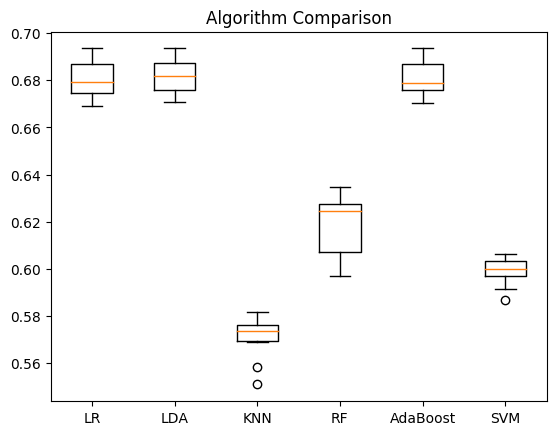

In [0]:
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr',random_state = random_state)))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('RF', RandomForestClassifier(random_state = random_state)))
models.append(('AdaBoost', AdaBoostClassifier(n_estimators = 100,random_state = random_state)))
models.append(('SVM', SVC(gamma='auto')))


# evaluate each model in turn
results = []
names = []
for name, model in models:
    kfold = StratifiedKFold(n_splits = 10, random_state = random_state, shuffle = True)
    cv_results = cross_val_score(model, x_train, y_train, cv = kfold, scoring = 'accuracy')
    results.append(cv_results)
    names.append(name)
    print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))
    
# Compare Algorithms
pyplot.boxplot(results, labels = names)
pyplot.title('Algorithm Comparison')
pyplot.show()

In [0]:
RF = RandomForestClassifier() 
RF.fit(x_train, y_train)
test_pred = RF.predict(x_test)

# Evaluate predictions
print(accuracy_score(y_test, test_pred))

# Print the name and gini importance of each feature
feat_labels = xtrain.columns
for feature in zip(feat_labels, RF.feature_importances_):
    print(feature)


In [0]:
# Create a selector object that will use the random forest classifier to identify
# features that have an importance of more than 0.15
sfm = SelectFromModel(RF, threshold=0.01)

# Train the selector
sfm.fit(x_train, y_train)

# Print the names of the most important features
for feature_list_index in sfm.get_support(indices=True):
    print(feat_labels[feature_list_index])

sec_min_transformed
shot_distance
home_play
action_type-Jump Shot
action_type-Layup Shot
combined_shot_type-Dunk
game_month-1
game_month-2
game_month-3
game_month-4
game_month-5
game_month-11
game_month-12


In [0]:
# Transform the data to create a new dataset containing only the most important features
# Note: We have to apply the transform to both the training X and test X data.
X_important_train = sfm.transform(x_train)
X_important_test = sfm.transform(x_test)
# Create a new random forest classifier for the most important features
RF_important = RandomForestClassifier()

# Train the new classifier on the new dataset containing the most important features
RF_important.fit(X_important_train, y_train)

# Apply The Full Featured Classifier To The train Data
y_pred = RF_important.predict(X_important_test)

print(accuracy_score(y_test, y_pred))

0.5774319066147859


In [0]:
# Make predictions on validation dataset, all features
# %%time
model = LinearDiscriminantAnalysis() 
model.fit(x_train, y_train)
all_predictions = model.predict(x_test)

# Evaluate predictions
print(accuracy_score(y_test, all_predictions))
print(confusion_matrix(y_test, all_predictions))
print(classification_report(y_test, all_predictions))

0.6809338521400778
[[1220  203]
 [ 617  530]]
              precision    recall  f1-score   support

         0.0       0.66      0.86      0.75      1423
         1.0       0.72      0.46      0.56      1147

    accuracy                           0.68      2570
   macro avg       0.69      0.66      0.66      2570
weighted avg       0.69      0.68      0.67      2570



---
## PART 2: RELATIONSHIP BETWEEN LAKERS' FRANCHISE & KOBE BRYANT'S PERFORMANCE
---

#### Mount the G-Drive

In [0]:
from google.colab import drive
import os

# Mount Google Drive
drive.mount('/content/drive')

# Set the root path
path = '/content/drive/Shared drives/IST718_KobeBryantProject'

# Change the directory
os.chdir(path)

print('\n-- Google Drive successfully mounted --')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive

-- Google Drive successfully mounted --


#### Loop through NBA Income Expense, Store Data Locally  
###### *--- NOT RUN ---*



In [0]:
#### ----------------------- NOT RUN ------------------------ ####
#### ---- SPREADSHEETS HAVE VARYING COLUMN NAMES, FORMATS ----####
#### ----------------------- NOT RUN ------------------------ ####

# # Update the working directory
# os.chdir(path + '/NBAIncomeExpense')

# # Loop through all valid data files, storing locally
# # income_expenses = []
# # for obj in os.listdir():
# #   if re.match('(NBA Finances)\S+\.\w{3,4}', obj):
# #     income_expenses.append(obj)


# # -- NOT RUN --
# import xlrd 
# import numpy as np

# # Open the workbook
# # Kobe played through the 2015-2016 season
# wb = xlrd.open_workbook(os.getcwd() + '/NBA Finances15-16.xlsx')

# # Select the sheet of interest
# sheet = wb.sheet_by_index(0)

# # Set an empty list to write to
# wb_data = []

# # Loop through the valuable rows, writing to the list
# for r in range(sheet.nrows):
#   if sheet.row_values(r).count('') == 0:
#     wb_data.append(sheet.row_values(r))

# # Convert the new list to a dataframe
# wb_df = pd.DataFrame(wb_data[1:], columns = wb_data[0])

# # Subset the new workbook
# wb_df = wb_df.loc[wb_df.Franchise == 'Los Angeles Lakers']

# # Add the start of the season to the new workbook
# wb_df['season'] = '2000'

# # Insert a column for current value
# wb_df.insert(1, 'CURR_VAL', np.nan)
# wb_df.insert(3, 'expense', (wb_df['Player'] + wb_df['Other']).values[0])

# # Drop the team column
# wb_df = wb_df.drop(['Franchise', 'Player', 'Other'], axis = 1)

# # Rename the new workbook columns
# wb_df.columns = ['current_value', 'revenue', 'expense', 'operating_income', 'season']

# # Add the new workbook to the aggregate dataframe
# la_finance_df = la_finance_df.append(wb_df, ignore_index = True)

# # Write the dataframe to the current drive to save place
# la_finance_df.to_csv('LA_Lakers_Finances_97-15.csv', index = False, sep = ',')

#### Read Rodney Fort's Sports Financial Data

> Annual Income, Expense Data

In [0]:
## Source: Data provided by Rodney Fort for analytical use
## https://sites.google.com/site/rodswebpages/codes
## https://drive.google.com/drive/folders/1pr_yPm9oPLcfCtWOtnrLoJdvzFDbYBAk

import pandas as pd

# Read in the aggregate financial data
lakers_fin = pd.read_excel('la_lakers_aggr_data_20200217.xlsx', sheet_name = 0)

# Sort the dataframe with the oldest start year first
lakers_fin = lakers_fin.sort_values('start_year')

# Set the table index as the renamed start year
lakers_fin = lakers_fin.rename(columns = {'start_year':'season'})
lakers_fin = lakers_fin.set_index('season')

# Drop the end year column
lakers_fin = lakers_fin.drop('end_year', axis = 1)

# Rename the rank column
lakers_fin = lakers_fin.rename(columns = {'rank':'financial_rank'})

# Add in 1996 data
# Source: 'American Sports Empire: How the Leagues Breed Success' (Jozsa)
lakers_fin.loc[1996, 'operating_income'] = 19.1

# Print information about the financial data
print('-- LAKERS FINANCIAL PERFORMANCE --')
lakers_fin.tail()

-- LAKERS FINANCIAL PERFORMANCE --


,gate_revenue,other_revenue,total_revenue,player_expense,other_expense,total_expense,operating_income,franchise_value,financial_rank
season,,,,,,,,,
2011,74.0,123.0,197.0,76.0,73.2,149.2,47.8,1000.0,2.0
2012,94.0,201.0,295.0,110.0,118.6,228.6,66.4,1350.0,2.0
2013,96.0,197.0,293.0,89.0,99.9,188.9,104.1,2600.0,1.0
2014,98.0,206.0,304.0,76.0,94.5,170.5,133.4,2700.0,2.0
2015,99.0,234.0,333.0,84.0,129.8,213.8,119.2,3000.0,1.0


> Annual Ticket Price, Fan Cost Data

In [0]:
## Source: Data provided by Rodney Fort for analytical use
## https://sites.google.com/site/rodswebpages/codes
## https://drive.google.com/drive/folders/1pr_yPm9oPLcfCtWOtnrLoJdvzFDbYBAk

# Read in the aggregate performance data
lakers_win = pd.read_excel('la_lakers_aggr_data_20200217.xlsx', sheet_name = 1)

# Set the table index as the renamed start year
lakers_win = lakers_win.rename(columns = {'start_year':'season'})
lakers_win = lakers_win.set_index('season')

# Drop the end year column
lakers_win = lakers_win.drop('end_year', axis = 1)

# Print information about the performance data
print('-- LAKERS GAME PERFORMANCE --')
lakers_win.head()

-- LAKERS GAME PERFORMANCE --


,attendance,fan_cost_index,ticket_price_index,win_ratio
season,,,,
1996,697132,232.56,38.39,0.683
1997,691994,250.60,41.65,0.744
1998,430007,295.44,51.11,0.620
1999,771420,427.56,81.89,0.817
2000,776336,446.76,87.69,0.683


#### Read Association of Professional Basketball Research's Data

In [0]:
## Source: Data provided by the Association of Professional Basketball Research
## http://www.apbr.org/attendance.html

import re

# Read in the aggreagate attendance data
attend = pd.read_csv('AnnualAttendance.txt', sep = '\t')

# Create a column for the year of the season start
attend['season'] = attend.iloc[:, 0].apply(lambda x: re.findall('(\d{4})\-\d{2}.+', x)[0])

# Create a column for the number of home games
attend['home_games'] = attend.iloc[:, 0].apply(lambda x: re.findall('\d{4}\-\d{2}\s(\d{2}).+', x)[0])

# Create a column for the total number of home game attendees, with comma removed
attend['total_attended'] = attend.iloc[:, 0].apply(lambda x: re.findall('\s(\d+\,\d+)', x)[0])
attend['total_attended'] = attend['total_attended'].apply(lambda x: re.sub(',', '', x))

# Create a column for the average number of home game attendees, with comma removed
attend['avg_attended'] = attend.iloc[:, 0].apply(lambda x: re.findall('\s(\d+\,\d+)', x)[1])
attend['avg_attended'] = attend['avg_attended'].apply(lambda x: re.sub(',', '', x))

# Drop the initial text column
attend = attend.drop('Season  GP    Total   Avg.', axis = 1)

# Reset the table index to be the season start year
attend = attend.set_index('season')

# Update the index to an Int64 format
attend.index = attend.index.astype('int64')

# Convert all columns to numeric format
cols = attend.columns
attend[cols] = attend[cols].apply(pd.to_numeric, errors = 'coerce')

# Print information about the performance data
print('-- LAKERS ATTENDANCE --')
attend.tail()

-- LAKERS ATTENDANCE --


,home_games,total_attended,avg_attended
season,,,
2011,33,626901,18997
2012,41,778877,18997
2013,41,771974,18829
2014,41,768244,18738
2015,41,778877,18997


#### Read Sports Reference's Data

> Schedule Data

In [0]:
## Source: Sports Reference API, Robert Clark
## https://sportsreference.readthedocs.io/en/stable/nba.html#

# !pip install sportsreference

from sportsreference.nba.teams import Teams, Schedule

# Set an empty dictionary to write to
record = {}

# Loop through all of Kobe's seasons, writing out the Lakers annual record
for y in range(1996, 2016):
  la_schedule = Schedule('LAL', year = y)
  wins = 0
  losses = 0

  for game in la_schedule:
    if game.result == 'Win':
      wins += 1
    else:
      losses += 1
  
  record.update({y: {'wins': wins, 'losses': losses}})

# Convert the record dictionary to a dataframe
record = pd.DataFrame(record).T

# Add a column for wins / losses ratio
record['wins_ratio'] = record.wins / (record.wins + record.losses)

# Print information about the record data
print('-- LAKERS ANNUAL RECORD --')
record.head()

-- LAKERS ANNUAL RECORD --


,wins,losses,wins_ratio
1996,54,32,0.627907
1997,60,31,0.659341
1998,68,27,0.715789
1999,34,24,0.586207
2000,82,23,0.780952


> Team Data

In [0]:
# Set an empty dictionary to write to
team = {}

# Loop through all of Kobe's seasons, writing stats to the lakers dictionary
for y in range(1996, 2016):
  team.update({y: dict(Teams(year = y).dataframes.loc['LAL', :])})

# Convert the lakers dictionary to a dataframe
team = pd.DataFrame(team).T

# Reorder the string, non-statistic columns
cols = list(team)
cols.insert(1, cols.pop(cols.index('name')))
team = team.loc[:, cols]

# Replace 'None' with np.nan
team.fillna(value = pd.np.nan, inplace = True)

# Drop columns with na values
team_clean = team.dropna(axis = 'columns')

# Convert all object data to numeric
cols = team_clean.columns.drop(['abbreviation', 'name'])
team_clean[cols] = team_clean[cols].apply(pd.to_numeric, errors = 'coerce')

# Print information about the team data
print('-- LAKERS ANNUAL TEAM STATISTICS --')
team_clean.head()

-- LAKERS ANNUAL TEAM STATISTICS --


,abbreviation,name,assists,blocks,defensive_rebounds,field_goal_attempts,field_goal_percentage,field_goals,free_throw_attempts,free_throw_percentage,free_throws,games_played,minutes_played,offensive_rebounds,opp_assists,opp_blocks,opp_defensive_rebounds,opp_field_goal_attempts,opp_field_goal_percentage,opp_field_goals,opp_free_throw_attempts,opp_free_throw_percentage,opp_free_throws,opp_offensive_rebounds,opp_personal_fouls,opp_points,opp_steals,opp_three_point_field_goal_attempts,opp_three_point_field_goal_percentage,opp_three_point_field_goals,opp_total_rebounds,opp_turnovers,opp_two_point_field_goal_attempts,opp_two_point_field_goal_percentage,opp_two_point_field_goals,personal_fouls,points,rank,steals,three_point_field_goal_attempts,three_point_field_goal_percentage,three_point_field_goals,total_rebounds,turnovers,two_point_field_goal_attempts,two_point_field_goal_percentage,two_point_field_goals
1996,LAL,Los Angeles Lakers,2080,516,2303,6706,0.480,3216,2049,0.746,1529,82,19680,995,2006,483,2316,6806,0.458,3118,1891,0.738,1395,1146,1806,8073,588,1203,0.367,442,3462,1334,5603,0.478,2676,1702,8438,7,722,1359,0.351,477,3298,1163,5347,0.512,2739
1997,LAL,Los Angeles Lakers,1845,575,2414,6642,0.454,3018,2330,0.692,1613,82,19930,1092,1880,388,2368,6619,0.441,2922,2126,0.718,1527,1110,1934,7850,620,1379,0.347,479,3478,1341,5240,0.466,2443,1818,8200,8,740,1500,0.367,551,3506,1222,5142,0.480,2467
1998,LAL,Los Angeles Lakers,2009,556,2471,6536,0.481,3146,2743,0.679,1863,82,19830,1079,1841,423,2339,6800,0.439,2984,2281,0.732,1669,1123,2151,8017,660,1071,0.355,380,3462,1281,5729,0.455,2604,1859,8652,1,734,1415,0.351,497,3550,1256,5121,0.517,2649
1999,LAL,Los Angeles Lakers,1095,287,1482,3935,0.468,1841,1503,0.683,1027,50,12050,619,1062,196,1403,3992,0.441,1759,1501,0.709,1064,628,1271,4799,408,653,0.332,217,2031,716,3339,0.462,1542,1231,4950,2,389,685,0.352,241,2101,754,3250,0.492,1600
2000,LAL,Los Angeles Lakers,1921,534,2738,6836,0.459,3137,2368,0.696,1649,82,19805,1117,1597,345,2531,6824,0.416,2838,2045,0.742,1518,1007,2099,7566,627,1142,0.326,372,3538,1196,5682,0.434,2466,1841,8267,6,613,1047,0.329,344,3855,1143,5789,0.482,2793


> Player's Career Data

In [0]:
import numpy as np
from sportsreference.nba.roster import Player

# Turn off the Pandas warning
pd.options.mode.chained_assignment = None

# Set the player to review (Mamba)
kobe = Player('bryanko01')

# Extract all of the player's career statistics
kobe = kobe.dataframe

# Drop the career average row
kobe = kobe.drop(['Career'])

# Update the index to reflect the start of each season
kobe.reset_index(inplace = True)
kobe.loc[:, 'level_0'] = kobe['level_0'].apply(lambda x: re.findall('(\d{4})\-', x)[0])
kobe.rename(columns = {'level_0':'season'}, inplace = True)
kobe = kobe.set_index(['season'])

# Update the index to an Int64 format
kobe.index = kobe.index.astype('int64')

# Reorder the string, non-statistic columns
cols = list(kobe)
cols.insert(0, cols.pop(cols.index('weight')))
cols.insert(0, cols.pop(cols.index('height')))
cols.insert(0, cols.pop(cols.index('position')))
cols.insert(0, cols.pop(cols.index('nationality')))
cols.insert(0, cols.pop(cols.index('player_id')))
cols.insert(0, cols.pop(cols.index('team_abbreviation')))
kobe = kobe.loc[:, cols]

# Replace 'None' with np.nan
kobe.fillna(value = pd.np.nan, inplace = True)

# Drop columns with na values
kobe_clean = kobe.dropna(axis = 'columns')

# Convert all object data to numeric
cols = kobe_clean.columns.drop(['team_abbreviation', 'player_id', 'nationality', 'position', 'height'])
kobe_clean[cols] = kobe_clean[cols].apply(pd.to_numeric, errors = 'coerce')

# Print information about the team data
print('-- KOBE CAREER STATISTICS --')
kobe_clean.head()

-- KOBE CAREER STATISTICS --


,team_abbreviation,player_id,nationality,position,height,weight,assist_percentage,assists,block_percentage,blocks,box_plus_minus,center_percentage,defensive_box_plus_minus,defensive_rebound_percentage,defensive_rebounds,defensive_win_shares,effective_field_goal_percentage,field_goal_attempts,field_goal_percentage,field_goals,free_throw_attempt_rate,free_throw_attempts,free_throw_percentage,free_throws,games_played,games_started,minutes_played,offensive_box_plus_minus,offensive_rebound_percentage,offensive_rebounds,offensive_win_shares,personal_fouls,player_efficiency_rating,point_guard_percentage,points,power_forward_percentage,salary,shooting_guard_percentage,small_forward_percentage,steal_percentage,steals,three_point_attempt_rate,three_point_attempts,three_point_percentage,three_pointers,total_rebound_percentage,total_rebounds,true_shooting_percentage,turnover_percentage,turnovers,two_point_attempts,two_point_percentage,two_pointers,usage_percentage,value_over_replacement_player,win_shares,win_shares_per_48_minutes
season,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1996,LAL,bryanko01,United States of America,SF,6-6,212,13.8,91,1.6,23,-0.1,0,0.1,8.7,85,1.3,0.477,422,0.417,176,0.393,166,0.819,136,71,6,1103,-0.2,4.9,47,0.5,102,14.4,0,539,0,1015000,0,0,2.3,49,0.322,136,0.375,51,6.8,132,0.544,18.5,112,286,0.437,125,24.7,0.5,1.8,0.079
1997,LAL,bryanko01,United States of America,SF,6-6,212,16.0,199,1.3,40,1.4,0,-0.8,8.7,163,1.8,0.469,913,0.428,391,0.501,457,0.794,363,79,1,2056,2.2,4.5,79,4.5,180,18.5,0,1220,0,1167240,0,0,1.8,74,0.241,220,0.341,75,6.7,242,0.548,12.4,157,693,0.456,316,27.2,1.8,6.3,0.147
1998,LAL,bryanko01,United States of America,SF,6-6,212,17.5,190,1.9,50,2.1,0,-0.1,12.7,211,1.5,0.482,779,0.465,362,0.375,292,0.839,245,50,50,1896,2.1,3.3,53,3.7,153,18.9,0,996,0,1319000,0,0,2.0,72,0.130,101,0.267,27,8.1,264,0.549,14.7,157,678,0.494,335,25.3,1.9,5.2,0.130
1999,LAL,bryanko01,United States of America,SF,6-6,212,22.4,323,1.7,62,5.1,0,1.6,12.9,308,4.5,0.488,1183,0.468,554,0.341,403,0.821,331,66,62,2524,3.5,4.6,108,6.1,220,21.7,0,1485,0,9000000,0,0,2.2,106,0.122,144,0.319,46,8.8,416,0.546,11.8,182,1039,0.489,508,26.8,4.5,10.6,0.202
2000,LAL,bryanko01,United States of America,SF,6-6,212,23.0,338,1.1,43,4.8,0,-0.3,11.8,295,2.2,0.484,1510,0.464,701,0.369,557,0.853,475,68,68,2783,5.1,4.3,104,9.2,222,24.5,0,1938,0,10130000,0,0,2.1,114,0.132,200,0.305,61,8.1,399,0.552,11.1,220,1310,0.489,640,31.8,4.7,11.3,0.196


#### Combine All Relevant Team, Kobe Data Sources

In [0]:
# Subset the Lakers Financial dataframe
cols = ['operating_income', 'franchise_value']
lakers_fin_setup = lakers_fin.loc[:, cols]

# Subset the Lakers Game Performance dataframe
cols = ['fan_cost_index', 'ticket_price_index']
lakers_win_setup = lakers_win.loc[:, cols]

# Merge the Financial and Game Performance subsets
lakers = lakers_fin_setup.merge(lakers_win_setup, how = 'left', left_index = True, right_index = True)

# Merge the new dataframe with the attendance dataframe
lakers = lakers.merge(attend, how = 'left', left_index = True, right_index = True)

# Merge the new dataframe with the record dataframe
lakers = lakers.merge(record, how = 'left', left_index = True, right_index = True)

# Subset the Team (clean) dataframe
cols = ['rank', 'games_played', 'minutes_played', 'points', 'total_rebounds', 'blocks', 'steals', 'turnovers',
        'two_point_field_goal_attempts', 'two_point_field_goal_percentage', 'three_point_field_goal_attempts', 
        'three_point_field_goal_percentage', 'free_throw_attempts', 'free_throw_percentage', 'personal_fouls', 
        'opp_points', 'opp_field_goal_attempts', 'opp_field_goal_percentage', 'opp_turnovers', 'opp_personal_fouls']
team_clean_setup = team_clean.loc[:, cols]

# Rename the subset columns to reflect the team's performance
team_clean_setup.columns = ['team_' + str(col) for col in team_clean_setup.columns]

# Merge the new dataframe with the Team (clean) dataframe
lakers = lakers.merge(team_clean_setup, how = 'left', left_index = True, right_index = True)

# Subset the Kobe (clean) dataframe
cols = ['salary', 'games_started', 'games_played', 'minutes_played', 'win_shares_per_48_minutes', 'win_shares', 
        'value_over_replacement_player', 'usage_percentage', 'box_plus_minus', 'defensive_box_plus_minus', 
        'offensive_box_plus_minus', 'defensive_win_shares', 'offensive_win_shares', 'true_shooting_percentage', 
        'player_efficiency_rating', 'points', 'personal_fouls']
kobe_clean_setup = kobe_clean.loc[:, cols]

# Rename the subset columns to reflect Kobe's performance
kobe_clean_setup.columns = ['kobe_' + str(col) for col in kobe_clean_setup.columns]

# Merge the new dataframe with the Kobe (clean) dataframe
lakers = lakers.merge(kobe_clean_setup, how = 'left', left_index = True, right_index = True)

# Print information about the final Lakers data
print('-- LAKERS ANALYSIS STATISTICS --')
lakers.head()

-- LAKERS ANALYSIS STATISTICS --


,operating_income,franchise_value,fan_cost_index,ticket_price_index,home_games,total_attended,avg_attended,wins,losses,wins_ratio,team_rank,team_games_played,team_minutes_played,team_points,team_total_rebounds,team_blocks,team_steals,team_turnovers,team_two_point_field_goal_attempts,team_two_point_field_goal_percentage,team_three_point_field_goal_attempts,team_three_point_field_goal_percentage,team_free_throw_attempts,team_free_throw_percentage,team_personal_fouls,team_opp_points,team_opp_field_goal_attempts,team_opp_field_goal_percentage,team_opp_turnovers,team_opp_personal_fouls,kobe_salary,kobe_games_started,kobe_games_played,kobe_minutes_played,kobe_win_shares_per_48_minutes,kobe_win_shares,kobe_value_over_replacement_player,kobe_usage_percentage,kobe_box_plus_minus,kobe_defensive_box_plus_minus,kobe_offensive_box_plus_minus,kobe_defensive_win_shares,kobe_offensive_win_shares,kobe_true_shooting_percentage,kobe_player_efficiency_rating,kobe_points,kobe_personal_fouls
season,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1996,19.1,211.00,232.56,38.39,41,697132,17003,54,32,0.627907,7,82,19680,8438,3298,516,722,1163,5347,0.512,1359,0.351,2049,0.746,1702,8073,6806,0.458,1334,1806,1015000,6,71,1103,0.079,1.8,0.5,24.7,-0.1,0.1,-0.2,1.3,0.5,0.544,14.4,539,102
1997,24.8,268.57,250.60,41.65,41,691994,16878,60,31,0.659341,8,82,19930,8200,3506,575,740,1222,5142,0.480,1500,0.367,2330,0.692,1818,7850,6619,0.441,1341,1934,1167240,1,79,2056,0.147,6.3,1.8,27.2,1.4,-0.8,2.2,1.8,4.5,0.548,18.5,1220,180
1998,-0.9,282.00,295.44,51.11,25,430007,17200,68,27,0.715789,1,82,19830,8652,3550,556,734,1256,5121,0.517,1415,0.351,2743,0.679,1859,8017,6800,0.439,1281,2151,1319000,50,50,1896,0.130,5.2,1.9,25.3,2.1,-0.1,2.1,1.5,3.7,0.549,18.9,996,153
1999,36.6,360.00,427.56,81.89,41,771410,18815,34,24,0.586207,2,50,12050,4950,2101,287,389,754,3250,0.492,685,0.352,1503,0.683,1231,4799,3992,0.441,716,1271,9000000,62,66,2524,0.202,10.6,4.5,26.8,5.1,1.6,3.5,4.5,6.1,0.546,21.7,1485,220
2000,31.1,403.00,446.76,87.69,41,776336,18935,82,23,0.780952,6,82,19805,8267,3855,534,613,1143,5789,0.482,1047,0.329,2368,0.696,1841,7566,6824,0.416,1196,2099,10130000,68,68,2783,0.196,11.3,4.7,31.8,4.8,-0.3,5.1,2.2,9.2,0.552,24.5,1938,222


#### Lakers Exploratory Data Analysis

> Dataframe Summary

In [0]:
# Describe the summary statistics for each column
lakers.describe()

,operating_income,franchise_value,fan_cost_index,ticket_price_index,home_games,total_attended,avg_attended,wins,losses,wins_ratio,team_rank,team_games_played,team_minutes_played,team_points,team_total_rebounds,team_blocks,team_steals,team_turnovers,team_two_point_field_goal_attempts,team_two_point_field_goal_percentage,team_three_point_field_goal_attempts,team_three_point_field_goal_percentage,team_free_throw_attempts,team_free_throw_percentage,team_personal_fouls,team_opp_points,team_opp_field_goal_attempts,team_opp_field_goal_percentage,team_opp_turnovers,team_opp_personal_fouls,kobe_salary,kobe_games_started,kobe_games_played,kobe_minutes_played,kobe_win_shares_per_48_minutes,kobe_win_shares,kobe_value_over_replacement_player,kobe_usage_percentage,kobe_box_plus_minus,kobe_defensive_box_plus_minus,kobe_offensive_box_plus_minus,kobe_defensive_win_shares,kobe_offensive_win_shares,kobe_true_shooting_percentage,kobe_player_efficiency_rating,kobe_points,kobe_personal_fouls
count,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.00000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,2.000000e+01,20.000000,20.00000,20.000000,20.000000,20.000000,20.000000,20.000000,20.00000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000
mean,47.215000,897.428500,432.687500,82.862545,39.800000,743244.000000,18648.700000,55.850000,35.300000,0.602114,7.00000,79.600000,19255.250000,8085.850000,3465.150000,433.600000,609.250000,1133.000000,5082.950000,0.490600,1467.150000,0.351300,2122.200000,0.730150,1690.450000,7848.200000,6640.850000,0.445150,1131.000000,1812.150000,1.641190e+07,59.900000,67.30000,2431.850000,0.144900,8.630000,4.005000,31.330000,3.58000,-0.270000,3.835000,2.530000,6.115000,0.543200,21.550000,1682.150000,167.650000
std,34.162495,850.496127,91.294019,19.391442,3.914884,83967.816916,705.550334,18.027099,10.352218,0.141860,4.74619,7.829768,1894.981235,882.958858,362.604798,76.436007,96.546076,115.191374,562.505343,0.015056,325.934329,0.014404,279.079804,0.036027,215.062653,884.026708,697.380307,0.012791,165.879474,227.832643,8.965822e+06,26.867903,18.88497,838.903939,0.086718,5.082281,2.440551,3.567263,3.18394,0.973923,2.541503,1.401916,3.972706,0.029013,4.419276,707.019041,60.318693
min,-0.900000,211.000000,232.560000,38.390000,25.000000,430007.000000,16878.000000,21.000000,23.000000,0.256098,1.00000,50.000000,12050.000000,4950.000000,2101.000000,287.000000,389.000000,754.000000,3250.000000,0.461000,685.000000,0.326000,1503.000000,0.679000,1109.000000,4799.000000,3992.000000,0.416000,716.000000,1271.000000,1.015000e+06,1.000000,6.00000,177.000000,-0.097000,-0.400000,-0.100000,24.700000,-5.10000,-2.400000,-3.100000,0.100000,-0.900000,0.469000,10.700000,83.000000,9.000000
25%,29.525000,420.250000,393.880000,77.095000,41.000000,769931.500000,18809.250000,44.500000,27.750000,0.535308,3.00000,82.000000,19773.750000,8139.250000,3438.750000,375.750000,577.500000,1093.500000,4946.000000,0.479750,1338.000000,0.344000,1983.500000,0.692750,1618.250000,7798.000000,6699.250000,0.438750,1071.750000,1727.750000,1.097000e+07,56.000000,65.75000,2016.000000,0.131500,5.950000,1.875000,29.000000,1.92500,-0.800000,2.175000,1.450000,4.075000,0.544000,18.800000,1205.250000,143.500000
50%,36.200000,564.000000,446.640000,88.465000,41.000000,777046.500000,18970.500000,58.000000,32.000000,0.643624,6.00000,82.000000,19817.500000,8285.500000,3574.500000,425.500000,612.500000,1149.500000,5206.000000,0.491500,1493.500000,0.352000,2137.500000,0.743000,1736.500000,7995.500000,6810.500000,0.444000,1161.500000,1870.000000,1.683281e+07,67.000000,72.00000,2734.000000,0.176000,10.450000,4.700000,31.850000,4.70000,-0.100000,4.500000,2.400000,6.950000,0.548500,23.100000,1878.500000,178.000000
75%,48.700000,925.000000,495.235000,96.250000,41.000000,778877

> Boxplots of Analytic Data

```
Analysis of results:
  1) Most team performance measurements are relatively normally distributed, except personal fouls and free throw percentage.
  2) The lakers point distribution is less spread out than their opponents, whom make a consistent number of field goal attempts.
  3) Ticket Prices and the Fan Cost Index are both negatively skewed, but attendance varies only slightly throughout time.
  4) Outside of some good years, most of the Lakers final ranking are on the lower side.
  5) Kobe's statistics are all relatively normally distributed except for personal fouls, which are negatively skewed.
  6) All aggregate measures of Kobe's performance (win shares, value over replacement, etc.) show positive results for most of his career.
```

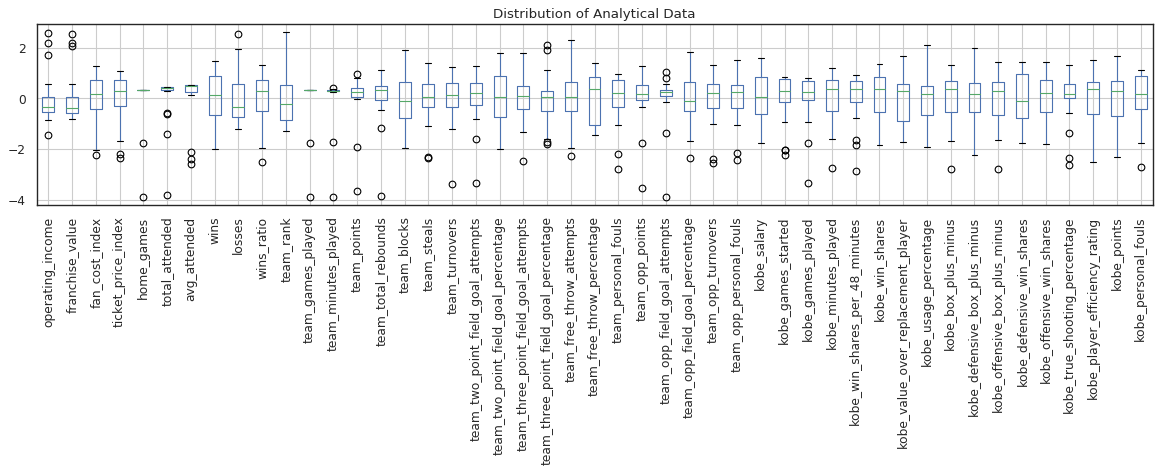

In [0]:
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Visualize the relationship between the data
sns.set(style = 'white')

# Create a normalized dataframe
lakers_z = lakers.copy()
for col in lakers_z.columns:
  lakers_z[col] = stats.zscore(lakers_z[col])

# Display a boxplot of each column
plt.figure(figsize = (18, 3), dpi = 80)
lakers_z.boxplot()
plt.xticks(list(map(lambda x: x + 1, list(range(len(lakers_z.columns))))), lakers_z.columns, rotation = 'vertical')
plt.title('Distribution of Analytical Data')
plt.show()

> Histograms of Analytic Data

```
Analysis of results:
  1) Kobe's usage percentage and the ratio of wins are relatively similarly shaped distributions.
  2) Kobe appears to have a stronger offensive wins shares rate than defensive win shares rate.
      (https://www.basketball-reference.com/about/ws.html)
  3) Operating income, when present, centralizes between +$0 and +$50M during most years, except for four high years.
  4) Team personal fouls and turnovers are negatively skewed, more so than their opponents.
```

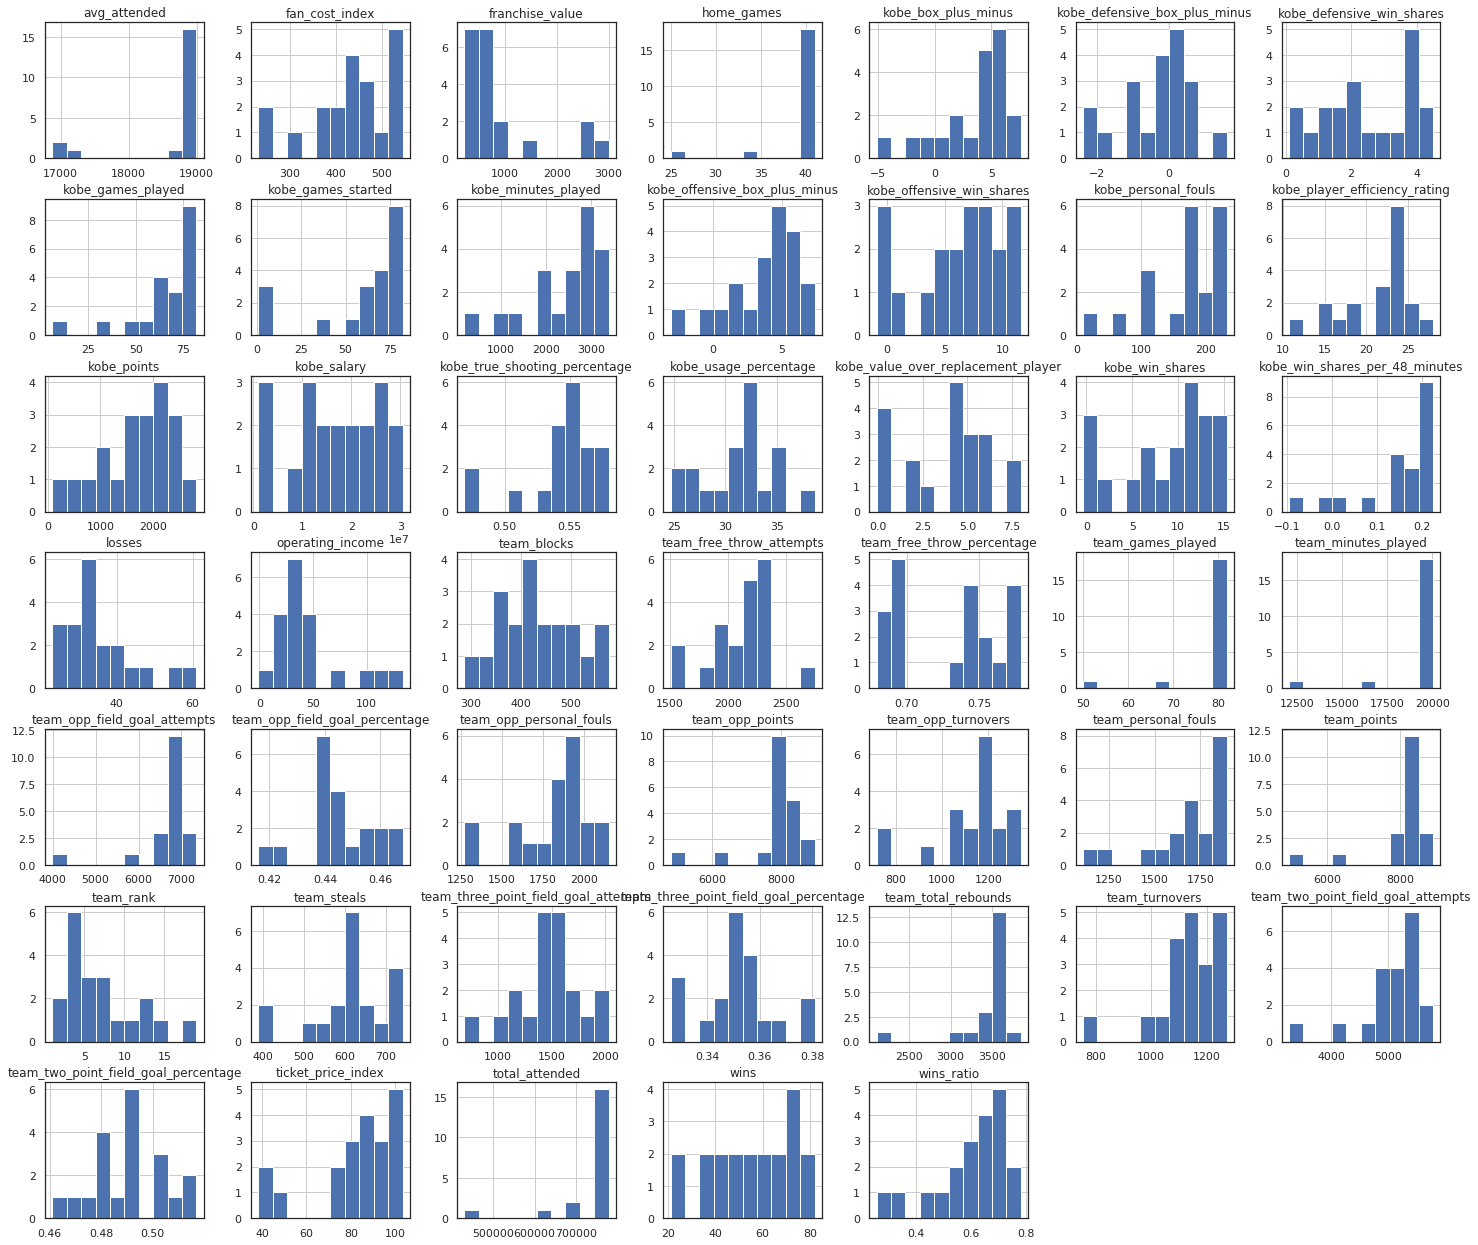

In [0]:
# Display a histogram of each column
lakers.hist(figsize = (25,22))
plt.show()

> Correlation Matrix

```
Analysis of results:
  1) The team performance measurements are generally correlated with itself and not with Kobe's performance measures, and vice versa.
  2) Ticket prices and general fan cost (parking, merchandise, concessions, etc.) are positively correlated with Kobe's salary (positive).
  3) The opponents field goal percentage is most closely correlated with Lakers wins and losses.
  4) Average attendance is slightly negatively correlated with team blocks and slightly positively correlated with Kobe's games played.
```

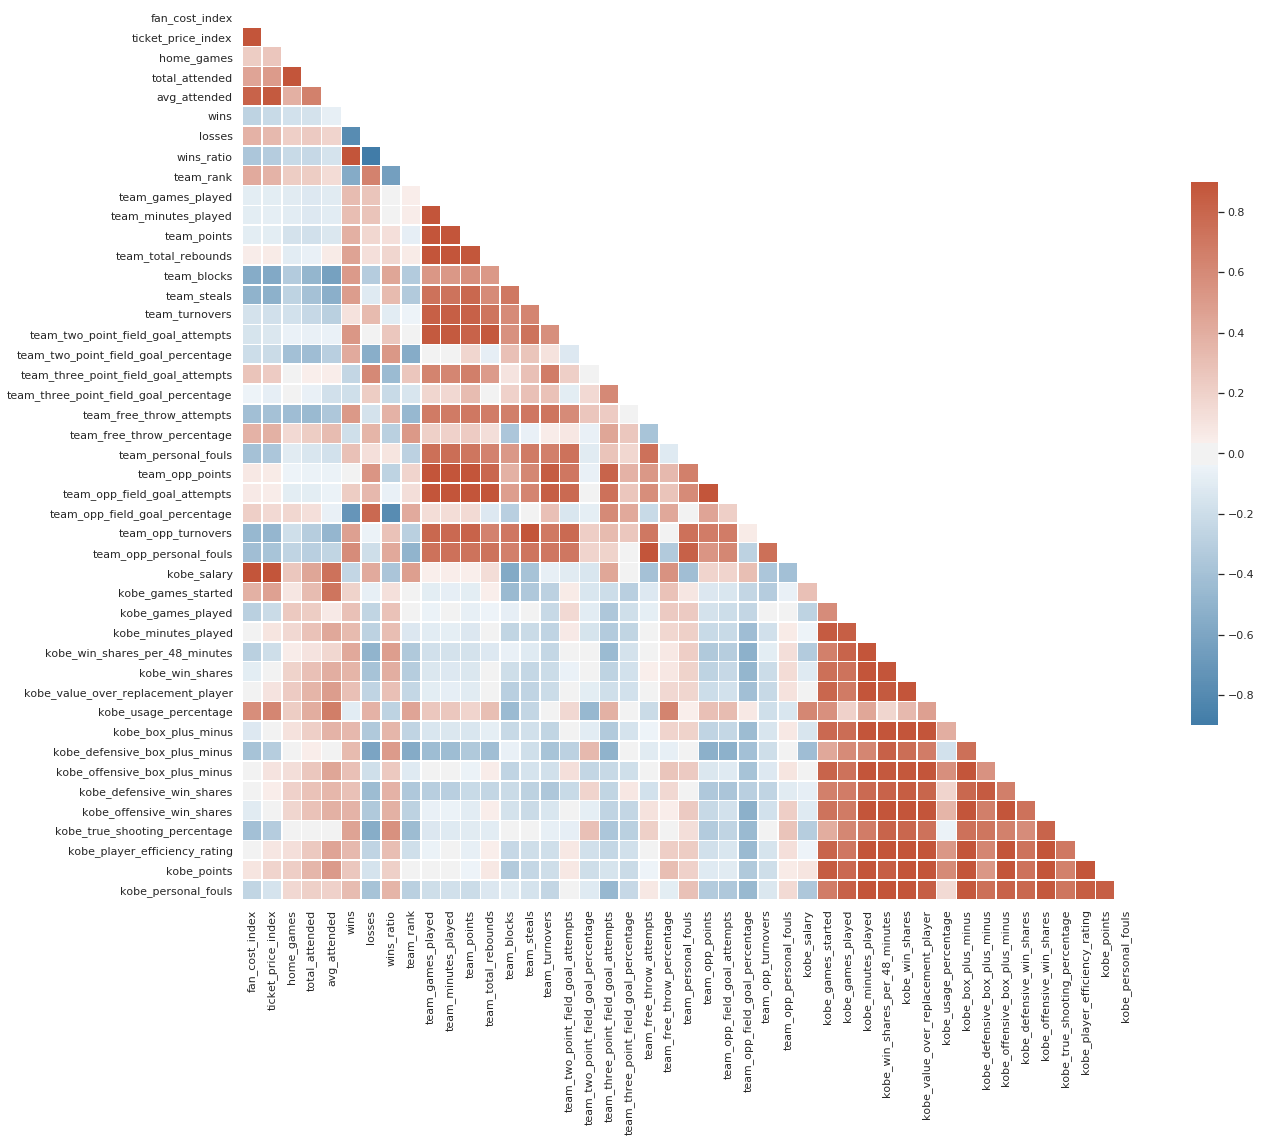

In [0]:
# Visualize the relationship between the data
sns.set(style = 'white')

# Compute the correlation matrix
corr = lakers.iloc[:, 2:].corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype = np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize = (20, 20))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(240, 20, n = 9, as_cmap = True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask = mask, cmap = cmap, vmin = -0.9, vmax = 0.9, center = 0,
            annot = False, square = True, linewidths = .5, cbar_kws = {"shrink": .5})

> Temporal Line Plot of High Level Performance Measures

```
Analysis of results:
  1) Team wins fell off sharply toward the end of Kobe's career when he became injured more often.
  2) Franchise value seems to be unrelated to all other measures.
  3) Kobe's points are inverted from the team points in at least two periods of time.
  4) Attendance grew sharply with the opening of the Staples Center and held relatively flat throughout the end of Kobe's career.
```

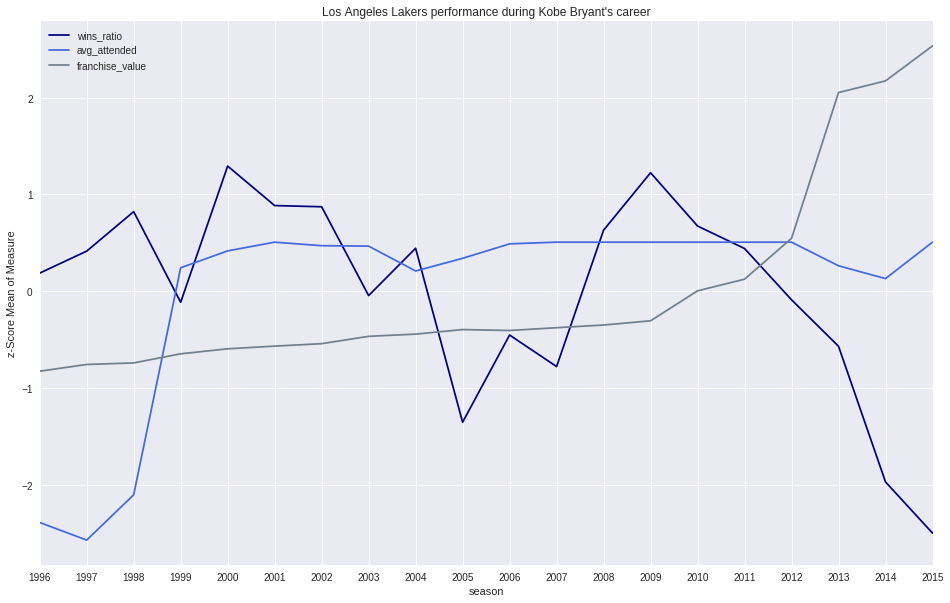

In [0]:
import math

# Create a list of columns to visualize
cols = ['wins_ratio', 'avg_attended', 'franchise_value']

# Create the lineplot
plt.style.use(['seaborn'])
lakers_z.loc[:, cols].plot(figsize = (16, 10), color = ['navy', 'royalblue', 'slategray'])
plt.xticks(range(min(lakers_z.index), math.ceil(max(lakers_z.index)) + 1))
plt.ylabel('z-Score Mean of Measure')
plt.title("Los Angeles Lakers performance during Kobe Bryant's career")
plt.show()

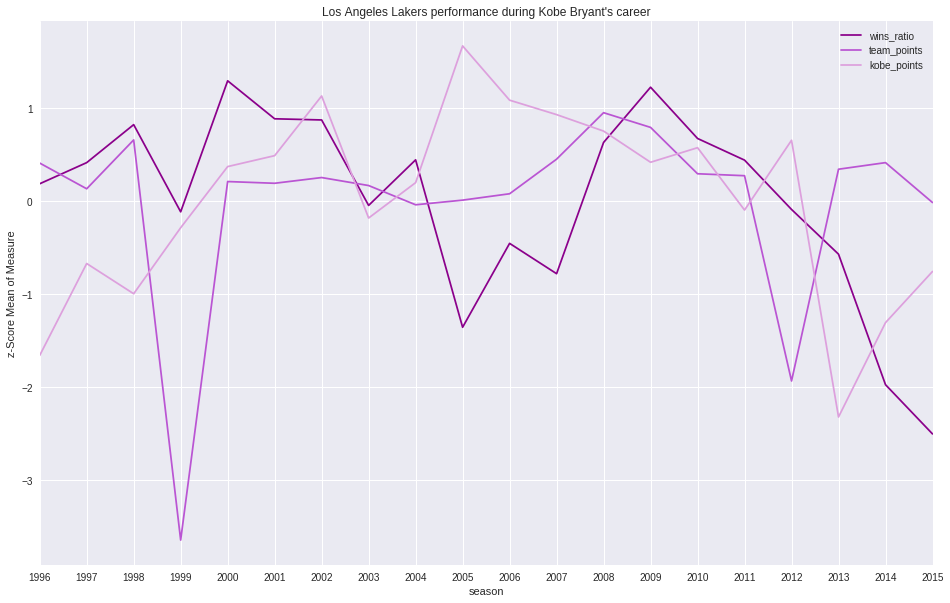

In [0]:
# Create a list of columns to visualize
cols = ['wins_ratio', 'team_points', 'kobe_points']

# Create the lineplot
plt.style.use(['seaborn'])
lakers_z.loc[:, cols].plot(figsize = (16, 10), color = ['darkmagenta', 'mediumorchid', 'plum'])
plt.xticks(range(min(lakers_z.index), math.ceil(max(lakers_z.index)) + 1))
plt.ylabel('z-Score Mean of Measure')
plt.title("Los Angeles Lakers performance during Kobe Bryant's career")
plt.show()

#### Forecasting Lakers Average Attendance

> Create the Time Series Object and Visual

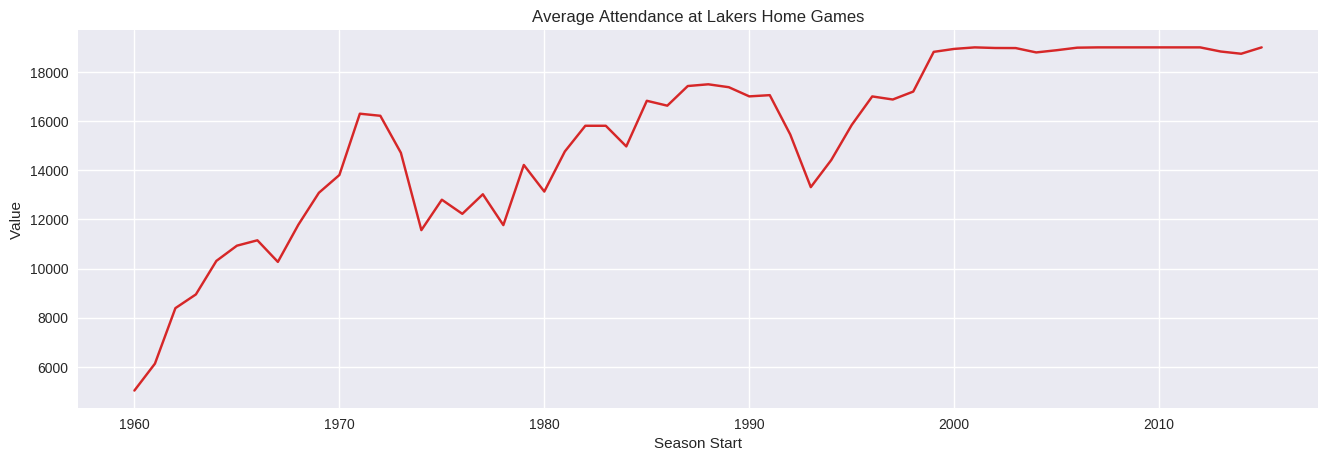

In [0]:
from fbprophet import Prophet

## Prepare the time series data

# Plot code sourced from Machine Learning Plus
# Source: https://www.machinelearningplus.com/time-series/time-series-analysis-python/

# Make a copy of the attendance data
attendance_ts = attend.copy()

# Subset the dataframe to appease the Prophet
attendance_ts = attendance_ts.loc[:, 'avg_attended']

# Reset the index to create the 'ds' field
attendance_ts = attendance_ts.reset_index(inplace = False)

# Rename the columns to appease the Prophet
attendance_ts.columns = ['ds', 'y']

# Convert the ds column to a datetime format
attendance_ts['ds'] = pd.to_datetime(attendance_ts.ds, format = '%Y')

# Plot the time series
def plot_df(df, x, y, title = '', xlabel = 'Season Start', ylabel = 'Value', dpi = 100):
    plt.figure(figsize=(16, 5), dpi = dpi)
    plt.plot(x, y, color = 'tab:red')
    plt.gca().set(title = title, xlabel = xlabel, ylabel = ylabel)
    plt.show()

plot_df(attendance_ts, x = attendance_ts.ds, y = attendance_ts.y, title = 'Average Attendance at Lakers Home Games')

## Assessment: Flat values starting in the late 1990's are likely sell-out totals

> Visualize Attendance Growth

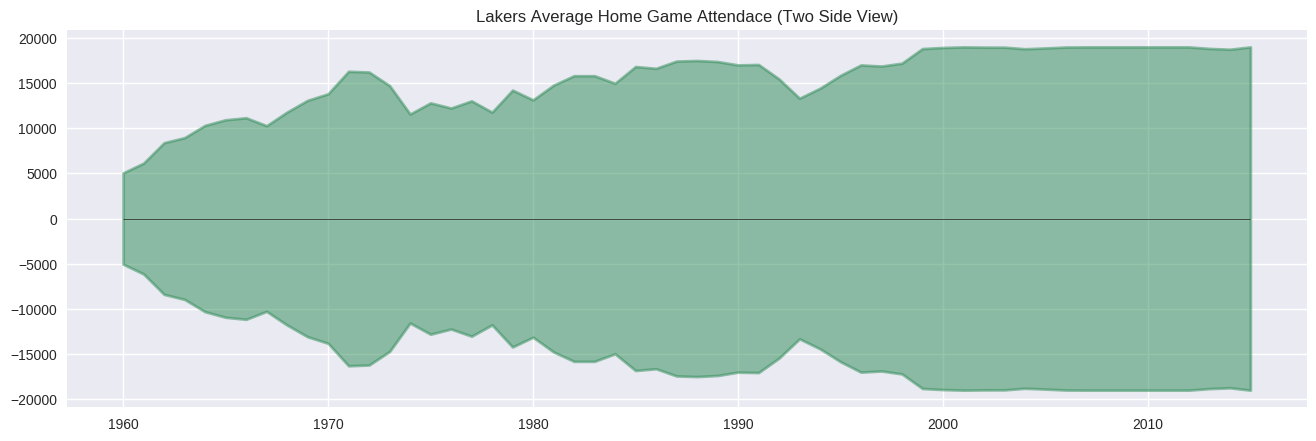

In [0]:
# Plot code sourced from Machine Learning Plus
# Source: https://www.machinelearningplus.com/time-series/time-series-analysis-python/

# Create the visual
fig, ax = plt.subplots(1, 1, figsize = (16, 5), dpi = 100)
plt.fill_between(attendance_ts.ds.values, y1 = attendance_ts.y, y2 = -attendance_ts.y, alpha = 0.5, linewidth = 2, color = 'seagreen')
plt.title('Lakers Average Home Game Attendace (Two Side View)')
plt.hlines(y = 0, xmin = np.min(attendance_ts.ds), xmax = np.max(attendance_ts.ds), linewidth = .5)
plt.show()

> ADF Testing

```
Analysis of results:
  1) While neither time series show aspects of being stationary, using a log tranformation improves stationarity.
```

In [0]:
# Code courtesy of Machine Learning Mastery
# Source: https://machinelearningmastery.com/time-series-data-stationary-python/

from numpy import log
from statsmodels.tsa.stattools import adfuller

## RAW DATA VALUES
# Subset the average attendance values
result = adfuller(attendance_ts.y.values)

# Print the ADF Statistic
print('-- ACTUAL DATA VALUES --')
print('ADF Statistic: %f' % result[0])

# Print the ADF p-value
print('p-value: %f' % result[1])

# Print the Critical Values
print('\n-- Critical Values --')
for key, value in result[4].items():
	print('%s: %.3f' % (key, value))
 
## Assessment: fail to reject the null hypothesis, the data has a unit root and is non-stationary

## LOG TRANSFORMED DATA VALUES
# Subset the average attendance values
result_log = adfuller(log(attendance_ts.y.values))

# Print the ADF Statistic
print('\n\n-- LOG TRANSFORMED (e) DATA VALUES --')
print('ADF Statistic: %f' % result_log[0])

# Print the ADF p-value
print('p-value: %f' % result_log[1])

# Print the Critical Values
print('\n-- Critical Values --')
for key, value in result_log[4].items():
	print('%s: %.3f' % (key, value))
 
## Assessment: better, but still fail to reject the null hypothesis, the data has a unit root and is non-stationary

-- ACTUAL DATA VALUES --
ADF Statistic: -1.884731
p-value: 0.339278

-- Critical Values --
1%: -3.578
5%: -2.925
10%: -2.601


-- LOG TRANSFORMED (e) DATA VALUES --
ADF Statistic: -2.091609
p-value: 0.247902

-- Critical Values --
1%: -3.578
5%: -2.925
10%: -2.601


> Time Series Prediction via FB Prophet

```
Analysis of results:
  1) The most recent change point in the attendance time series occurred during 1992, when Magic Johnson attempted a comeback.
```

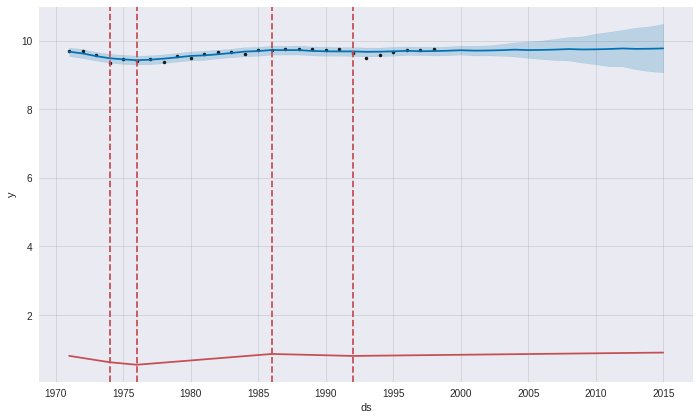

In [0]:
## Per Inside Arenas, the Staples Center has a capacity of 18,997
## Source: http://www.insidearenas.com/western/StaplesCenter.htm

from fbprophet import Prophet
from fbprophet.plot import add_changepoints_to_plot
from datetime import timedelta

# Create a training dataset of dates between the Lakers 1971 NBA Championship Season and the opening of the Staples Center
train = attendance_ts.loc[attendance_ts['ds'].dt.year > 1970, :]
train = train.loc[train['ds'].dt.year < 1999, :]

# Use a natural log (e) transformation for the average attendance totals
train.loc[:, 'y'] = train.y.apply(lambda x: log(x))

# Instantiate the model with 95% confidence setting
fb_model = Prophet(interval_width = 0.95, daily_seasonality = False, weekly_seasonality = False, n_changepoints = 21)

# Fit the model
fb_model.fit(train)

# Create a column of future dates to forecast with
future_dates = fb_model.make_future_dataframe(periods = 17, freq = 'Y')
future_dates.loc[future_dates.index >= 28, :] = future_dates.loc[future_dates.index >= 28, :].apply(lambda x: x + timedelta(1))

# Generate the forecast, from 1996 to 2015
fb_forecast = fb_model.predict(future_dates)

# Plot the fitted model
fig = fb_model.plot(fb_forecast, uncertainty = True)
a = add_changepoints_to_plot(fig.gca(), fb_model, fb_forecast)
plt.show()

> Prediction Assessment

```
Analysis of results:
  1) With a RMSE of +1,424 people (actual - predicted average attendance), most predictions missed low.
  2) The gap between actual and predicted can be explored further, analyzing the impact of opening the Staples Center or Kobe's performance.
  3) A ceiling is put in place due to the max capacity of the Staples Center, showing consistent average sell-outs throughout Kobe's career.
```

# The RMSE is: 1423.62


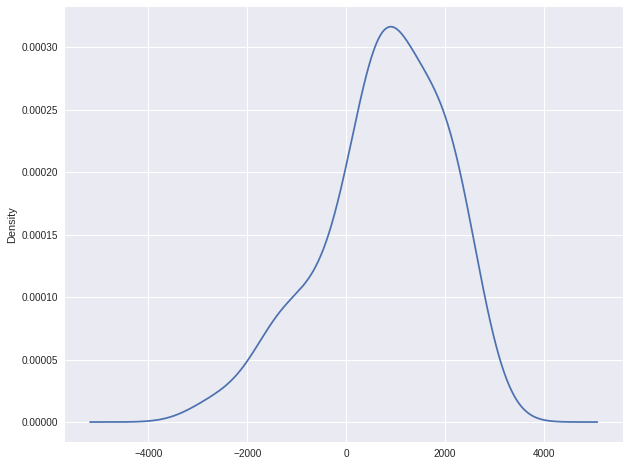

In [0]:
# Subset the predicted values
fb_assessment = fb_forecast.copy()
fb_assessment = fb_assessment.loc[:, ['ds', 'yhat']]

# Convert the natural log back to attendace
fb_assessment.loc[:, 'yhat'] = fb_assessment.yhat.apply(lambda x: math.exp(x))

# Correct the ceiling, if necessary, given the Staples Center capacity
fb_assessment.loc[:, 'yhat'] = fb_assessment.yhat.apply(lambda x: 18997 if x > 18997 else x)

# Append the actual value to the dataframe
actual = attendance_ts.loc[attendance_ts['ds'].dt.year > 1970, :]
actual = actual.loc[actual['ds'].dt.year < 2016, 'y']
fb_assessment['y'] = actual.values

# Calculate the Error for each month
fb_assessment['error'] = fb_assessment.y - fb_assessment.yhat

# Calculate the RSS, MSE, RMSE
rss = (fb_assessment.error**2).sum()
mse = np.mean(fb_assessment.error**2)
rmse = np.sqrt(np.mean(fb_assessment.error**2))

# Plot the distribution of errors
print('# The RMSE is: {}'.format(round(rmse, 2)))
fb_assessment.error.plot(kind = 'kde', figsize = (10, 8))
plt.show()

#### Financial Assessment of Forecast

> Calculate the Revenue Surplus and Plot

```
Analysis of results:
  1) Assessing the financial impact of Kobe's career is calculated as the difference in ticket revenue (from predicted), haircut by Kobe's
     usage percentage, and reduced by Kobe's salary.
  2) The results show a net gain for the Lakers, between 1996 & 2002, then declining through the end of Kobe's career (as salary increases).
  3) At it's peak, Kobe created a surplus of $3.0M during the 2000-2001 season, coincidentally winning the NBA Championship that season.
```

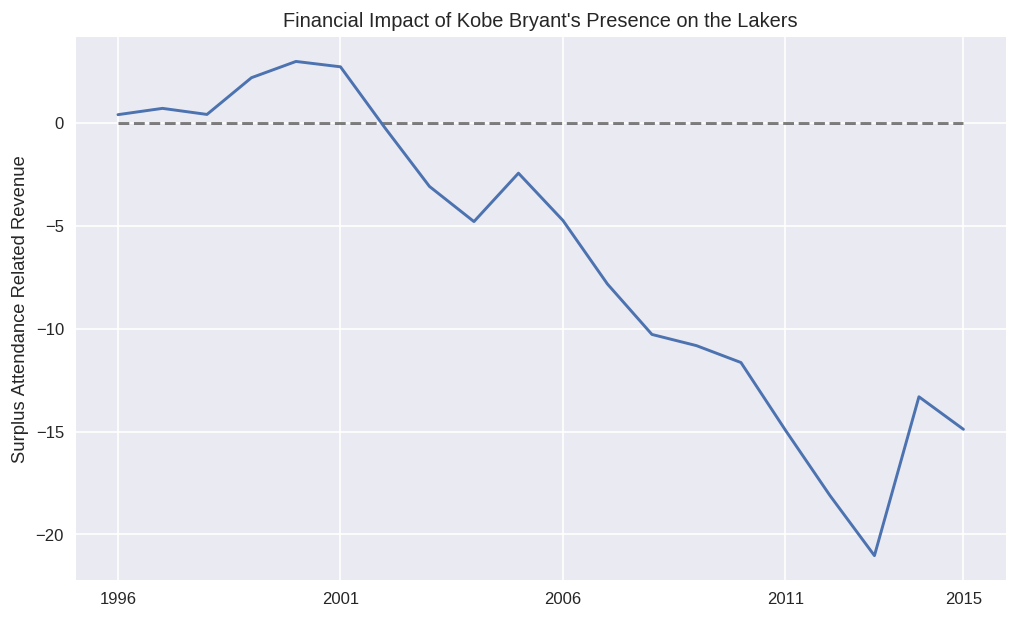

In [0]:
# Subset the analytic data
cols = ['operating_income', 'franchise_value', 'fan_cost_index', 'ticket_price_index', 
       'home_games', 'kobe_salary', 'kobe_usage_percentage', 'kobe_win_shares']
finance = lakers.copy()
finance = finance.loc[:, cols]

# Add on the forecasted attendace data
assessed = fb_assessment.copy()
assessed.set_index(assessed.ds.dt.year, drop = True, inplace = True)
assessed = assessed.drop(['ds'], axis = 1)
finance = finance.merge(assessed, how = 'left', left_index = True, right_index = True)

# Create a calcualted ticket revenue surplus, sans Kobe's Salary 
finance['kobe_surplus'] = ((finance.home_games * finance.error * finance.fan_cost_index * (finance.kobe_usage_percentage / 100)) - finance.kobe_salary) / 1000000

# Create the time series visual
plt.figure(figsize = (10, 6), dpi = 120)
plt.plot(finance.index, finance.kobe_surplus)
plt.hlines(0, 1996, 2015, colors = 'black', alpha = 0.5, linestyles = 'dashed')
plt.title("Financial Impact of Kobe Bryant's Presence on the Lakers")
plt.ylabel('Surplus Attendance Related Revenue')
plt.xticks((1996, 2001, 2006, 2011, 2015))
plt.show()

#### Top NBA Team Classification

> Create the Top NBA Team Label, Model Dataframe

In [0]:
# Lakers Top 4 Finish
lakers['finals_ind'] = lakers['team_rank'].apply(lambda x: 1 if x <= 4 else 0)

# Create the dataframe with the new label
top = pd.DataFrame(lakers.finals_ind)

# Create a list of columns for the analysis
cols = ['team_rank', 'home_games', 'team_games_played', 'team_points', 'team_total_rebounds', 'team_blocks', 'team_steals', 'team_turnovers',
        'team_two_point_field_goal_attempts', 'team_three_point_field_goal_attempts', 'team_free_throw_attempts', 'team_personal_fouls',
        'kobe_games_started', 'kobe_minutes_played', 'kobe_value_over_replacement_player','kobe_defensive_box_plus_minus', 'kobe_offensive_box_plus_minus']

# Add the selected columns to the new dataframe
top = top.merge(lakers.loc[:, cols], how = 'left', left_index = True, right_index = True)

# Add a new field illustrating the ratio of home games
top['home_games'] = top.home_games / top.team_games_played

# Drop the total games played field
top = top.drop(['team_games_played'], axis = 1)

# Normalize all predictor variables
for col in top.iloc[:, 1:].columns:
  top[col] = stats.zscore(top[col])

# Print information about the final model data
print('-- NBA TOP 4 MODEL DATA --')
top.head()

-- NBA TOP 4 MODEL DATA --


,finals_ind,team_rank,home_games,team_points,team_total_rebounds,team_blocks,team_steals,team_turnovers,team_two_point_field_goal_attempts,team_three_point_field_goal_attempts,team_free_throw_attempts,team_personal_fouls,kobe_games_started,kobe_minutes_played,kobe_value_over_replacement_player,kobe_defensive_box_plus_minus,kobe_offensive_box_plus_minus
season,,,,,,,,,,,,,,,,,
1996,0,0.000000,-0.082117,0.409190,-0.472945,1.106031,1.198175,0.267202,0.481612,-0.340435,-0.269104,0.055100,-2.058227,-1.625182,-1.473460,0.389776,-1.628888
1997,0,0.216169,-0.082117,0.132640,0.115584,1.897971,1.389458,0.792699,0.107704,0.103405,0.763933,0.608490,-2.249157,-0.459664,-0.926956,-0.558328,-0.660033
1998,1,-1.297013,-2.239642,0.657854,0.240080,1.642940,1.325697,1.095528,0.069401,-0.164158,2.282241,0.804085,-0.378042,-0.655344,-0.884917,0.179086,-0.700402
1999,1,-1.080844,3.456225,-3.643787,-3.859818,-1.967769,-2.340558,-3.375650,-3.343199,-2.462057,-2.276359,-2.191853,0.080191,0.112699,0.208092,1.969950,-0.135236
2000,0,-0.216169,-0.082117,0.210492,1.103068,1.347640,0.039851,0.089067,1.287796,-1.322551,0.903632,0.718214,0.309307,0.429456,0.292170,-0.031603,0.510667


> Top Team Values Exploration

```
Analysis of results:
  1) Surprisingly, the Lakers defense appeared to be most prominent when the Lakers achieved a final four finish.
      a) Team blocks, steals, and tunovers are far superior during top four seasons, than total points, rebounds, and three pointers.
      b) Additionally, seasons with more free throw attempts highlighted a better finish.
  2) Kobe's measures are generally more polarizing than team performance.
      a) When Kobe plays more minutes and has a strong defensive plus/minus, the team appears to win more (relative to offensive plus/minus).
```

In [0]:
# Print the mean value for each variable, per Label
print('-- NBA TOP 4 DATA MEANS --')
top.groupby('finals_ind').mean().T

-- NBA TOP 4 DATA MEANS --


finals_ind,0,1
team_rank,0.594464,-0.891697
home_games,-0.060324,0.090485
team_points,0.055756,-0.083633
team_total_rebounds,0.090354,-0.135531
team_blocks,-0.055033,0.082550
team_steals,-0.116010,0.174014
team_turnovers,0.183330,-0.274995
team_two_point_field_goal_attempts,-0.015260,0.022890
team_three_point_field_goal_attempts,0.308013,-0.462019
team_free_throw_attempts,-0.176891,0.265336




> Visualize Team Points against Kobe's Efficiency Rating



```
Analysis of results:
  1) The visual further illustrates Kobe's defensive performance relates to more or less team wins (assuming wins are synonymous with rank).
```

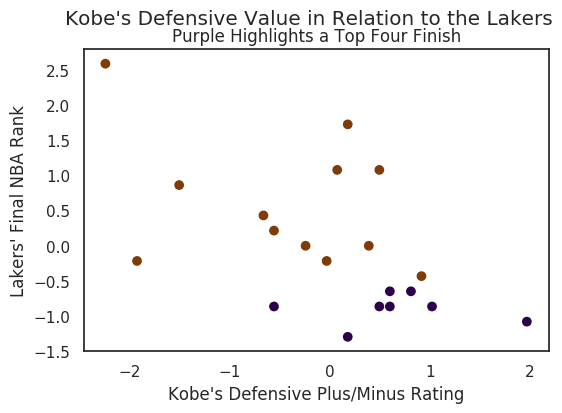

In [0]:
# Visualize Three Point Attempts vs. Kobe's Value over a Replacement Player
plt.figure(figsize = (6, 4), dpi = 100)
plt.scatter(top.kobe_defensive_box_plus_minus, top.team_rank, c = top.finals_ind, cmap = 'PuOr')
plt.xlabel("Kobe's Defensive Plus/Minus Rating")
plt.ylabel("Lakers' Final NBA Rank")
plt.suptitle("Kobe's Defensive Value in Relation to the Lakers")
plt.title("Purple Highlights a Top Four Finish")
plt.show()

> Review Correlation between Model Variables

```
Analysis of results:
  1) The most strongly correlated variable with 'team rank' is Kobe's defensive plus/minus (-0.56).
      a) This means that as Kobe's performance improved, so does team rank (for which lower is better).
  2) The next two most correlated variables are Team Free Throw Attempts (-0.47) and Team Steals (-0.34).
```

In [0]:
# Create the correlation calucaltion
top_corr = top.corr()

# Review the matrix
print('-- NBA TOP 4 CORRELATION --')
top_corr

-- NBA TOP 4 CORRELATION --


,finals_ind,team_rank,home_games,team_points,team_total_rebounds,team_blocks,team_steals,team_turnovers,team_two_point_field_goal_attempts,team_three_point_field_goal_attempts,team_free_throw_attempts,team_personal_fouls,kobe_games_started,kobe_minutes_played,kobe_value_over_replacement_player,kobe_defensive_box_plus_minus,kobe_offensive_box_plus_minus
finals_ind,1.000000,-0.728067,0.073881,-0.068286,-0.110661,0.067402,0.142082,-0.224533,0.018690,-0.377237,0.216646,0.124841,0.311008,0.294604,0.298623,0.522534,0.239792
team_rank,-0.728067,1.000000,0.041268,-0.076963,0.062449,-0.325701,-0.336423,-0.039951,-0.016225,0.264222,-0.466449,-0.281533,-0.002889,-0.124586,-0.241273,-0.560198,-0.106463
home_games,0.073881,0.041268,1.000000,-0.859915,-0.808828,-0.591267,-0.709079,-0.767742,-0.724425,-0.496159,-0.751892,-0.625552,0.105200,0.151448,0.185363,0.376997,0.067084
team_points,-0.068286,-0.076963,-0.859915,1.000000,0.889604,0.570453,0.788400,0.828722,0.818061,0.663889,0.699291,0.716476,-0.090474,-0.120281,-0.101049,-0.342181,-0.046221
team_total_rebounds,-0.110661,0.062449,-0.808828,0.889604,1.000000,0.516530,0.596355,0.719728,0.877050,0.499388,0.678068,0.646517,0.041140,-0.004196,-0.004396,-0.420486,0.055089
team_blocks,0.067402,-0.325701,-0.591267,0.570453,0.516530,1.000000,0.696793,0.591139,0.559962,0.099445,0.661519,0.523352,-0.456788,-0.256680,-0.301593,-0.057098,-0.266845
team_steals,0.142082,-0.336423,-0.709079,0.788400,0.596355,0.696793,1.000000,0.627555,0.724761,0.296089,0.703145,0.682867,-0.350659,-0.211317,-0.266619,-0.187765,-0.155269
team_turnovers,-0.224533,-0.039951,-0.767742,0.828722,0.719728,0.591139,0.627555,1.000000,0.574801,0.678231,0.719900,0.657502,-0.285167,-0.263753,-0.209923,-0.385257,-0.180677
team_two_point_field_goal_attempts,0.018690,-0.016225,-0.724425,0.818061,0.877050,0.559962,0.724761,0.574801,1.000000,0.214212,0.594334,0.734484,0.057074,0.067785,-0.029930,-0.282457,0.120222
team_three_point_field_goal_attempts,-0.377237,0.264222,-0.496159,0.663889,0.499388,0.099445,0.296089,0.678231,0.214212,1.000000,0.234484,0.277623,-0.202172,-0.329387,-0.187671,-0.504702,-0.226979


> Review VIF for Multicolinearity

```
Analysis of results:
  1) Multicolinearity exists more or less across all variables.
```

In [0]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create an empty dataframe to write to  
vif = pd.DataFrame()

# Calculate the VIF value
vif['vif_factor'] = [variance_inflation_factor(top.iloc[:, 2:].values, i) for i in range(top.iloc[:, 2:].shape[1])]

# Name the VIF values
vif['features'] = top.iloc[:, 2:].columns

# Review the results
print('-- NBA TOP 4 VIF --')
vif.round(1)

-- NBA TOP 4 VIF --


,vif_factor,features
0,8.3,home_games
1,128.8,team_points
2,58.0,team_total_rebounds
3,8.6,team_blocks
4,24.5,team_steals
5,10.3,team_turnovers
6,139.6,team_two_point_field_goal_attempts
7,78.8,team_three_point_field_goal_attempts
8,45.8,team_free_throw_attempts
9,17.7,team_personal_fouls


> Model Version 1.0 - Ordinary Least Squares

In [0]:
# Import the necessary libraries
import statsmodels.formula.api as smf

# Set the model parameters
ols_input = str('team_rank ~ home_games + team_points + team_total_rebounds + team_blocks + team_steals + team_turnovers +\
                 team_two_point_field_goal_attempts + team_three_point_field_goal_attempts + team_free_throw_attempts + team_personal_fouls +\
                 kobe_games_started + kobe_minutes_played + kobe_value_over_replacement_player + kobe_defensive_box_plus_minus + kobe_offensive_box_plus_minus')

# Fit the Ordinary Least Squares model
fit = smf.ols(ols_input, data = top).fit()

# Review the training model performance
print('-- NBA TOP 4 OLS SUMMARY V1.0 --')
print(fit.summary())

-- NBA TOP 4 OLS SUMMARY V1.0 --
                            OLS Regression Results                            
Dep. Variable:              team_rank   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.271
Method:                 Least Squares   F-statistic:                     1.470
Date:                Thu, 05 Mar 2020   Prob (F-statistic):              0.384
Time:                        02:03:48   Log-Likelihood:                -9.6433
No. Observations:                  20   AIC:                             51.29
Df Residuals:                       4   BIC:                             67.22
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                           coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------

Model Version 1.1 - OLS with Top 3 Highest p-Values Removed

In [0]:
# Set the model parameters
ols_input2 = str('team_rank ~ home_games + team_points + team_total_rebounds + team_blocks + team_steals + team_turnovers +\
                 team_free_throw_attempts + team_personal_fouls + kobe_games_started + kobe_value_over_replacement_player +\
                 kobe_defensive_box_plus_minus + kobe_offensive_box_plus_minus')

# Fit the Ordinary Least Squares model
fit2 = smf.ols(ols_input2, data = top).fit()

# Review the training model performance
print('-- NBA TOP 4 OLS SUMMARY V1.1 --')
print(fit2.summary())

-- NBA TOP 4 OLS SUMMARY V1.1 --
                            OLS Regression Results                            
Dep. Variable:              team_rank   R-squared:                       0.754
Model:                            OLS   Adj. R-squared:                  0.332
Method:                 Least Squares   F-statistic:                     1.787
Date:                Thu, 05 Mar 2020   Prob (F-statistic):              0.225
Time:                        02:07:21   Log-Likelihood:                -14.358
No. Observations:                  20   AIC:                             54.72
Df Residuals:                       7   BIC:                             67.66
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------

Model Version 1.2 - OLS with Next Top 2 Highest p-Values Removed

In [0]:
# Set the model parameters
ols_input3 = str('team_rank ~ home_games + team_total_rebounds + team_blocks + team_turnovers + team_free_throw_attempts +\
                  team_personal_fouls + kobe_games_started + kobe_value_over_replacement_player + kobe_defensive_box_plus_minus +\
                  kobe_offensive_box_plus_minus')

# Fit the Ordinary Least Squares model
fit3 = smf.ols(ols_input3, data = top).fit()

# Review the training model performance
print('-- NBA TOP 4 OLS SUMMARY V1.2 --')
print(fit3.summary())

-- NBA TOP 4 OLS SUMMARY V1.2 --
                            OLS Regression Results                            
Dep. Variable:              team_rank   R-squared:                       0.712
Model:                            OLS   Adj. R-squared:                  0.391
Method:                 Least Squares   F-statistic:                     2.220
Date:                Thu, 05 Mar 2020   Prob (F-statistic):              0.123
Time:                        02:12:27   Log-Likelihood:                -15.947
No. Observations:                  20   AIC:                             53.89
Df Residuals:                       9   BIC:                             64.85
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------

Model Version 1.3 - OLS with p-Values Above 0.1 Removed

In [0]:
# Set the model parameters
ols_input4 = str('team_rank ~ team_total_rebounds + team_blocks + team_turnovers + team_free_throw_attempts +\
                  team_personal_fouls + kobe_games_started + kobe_defensive_box_plus_minus')

# Fit the Ordinary Least Squares model
fit4 = smf.ols(ols_input4, data = top).fit()

# Review the training model performance
print('-- NBA TOP 4 OLS SUMMARY V1.3 --')
print(fit4.summary())

-- NBA TOP 4 OLS SUMMARY V1.3 --
                            OLS Regression Results                            
Dep. Variable:              team_rank   R-squared:                       0.694
Model:                            OLS   Adj. R-squared:                  0.515
Method:                 Least Squares   F-statistic:                     3.885
Date:                Thu, 05 Mar 2020   Prob (F-statistic):             0.0193
Time:                        02:12:31   Log-Likelihood:                -16.543
No. Observations:                  20   AIC:                             49.09
Df Residuals:                      12   BIC:                             57.05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------

Model Version 1.4 - OLS with p-Values Above 0.05 Removed

In [0]:
# Set the model parameters
ols_input5 = str('team_rank ~ team_blocks + team_turnovers + team_free_throw_attempts +\
                  team_personal_fouls + kobe_games_started + kobe_defensive_box_plus_minus')

# Fit the Ordinary Least Squares model
fit5 = smf.ols(ols_input5, data = top).fit()

# Review the training model performance
print('-- NBA TOP 4 OLS SUMMARY V1.4 --')
print(fit5.summary())

-- NBA TOP 4 OLS SUMMARY V1.4 --
                            OLS Regression Results                            
Dep. Variable:              team_rank   R-squared:                       0.692
Model:                            OLS   Adj. R-squared:                  0.549
Method:                 Least Squares   F-statistic:                     4.860
Date:                Thu, 05 Mar 2020   Prob (F-statistic):            0.00819
Time:                        02:12:35   Log-Likelihood:                -16.613
No. Observations:                  20   AIC:                             47.23
Df Residuals:                      13   BIC:                             54.20
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------

> Assess the Model Version 1.3 Outcome *(best balance of predictors, results)*

```
Analysis of results:
  1) A linear relationship exists between Kobe's and the Lakers' performance and the final NBA ranking.
  2) Team Free Throw Attempts and Kobe's defensive plus/minus ratio are the strongest predictor of a better finish (lower ranking).
  3) While the p-value is high for the following, team turnovers and the number of games Kobe started also have an impact on the team rank.
  4) The model generally follows the linear relationship, but underpredicts by approximately a half of a standard deviation.
  5) The RMSE is bimodal with a higher propensity to predict a better than actual rank.
```

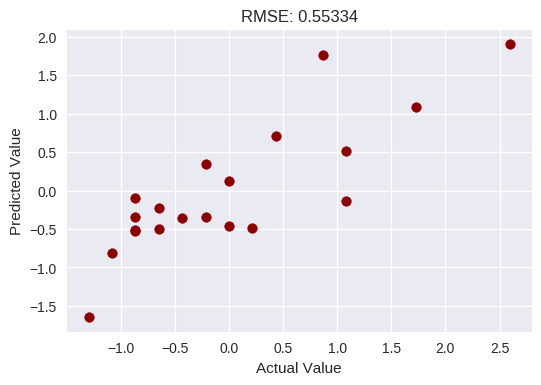

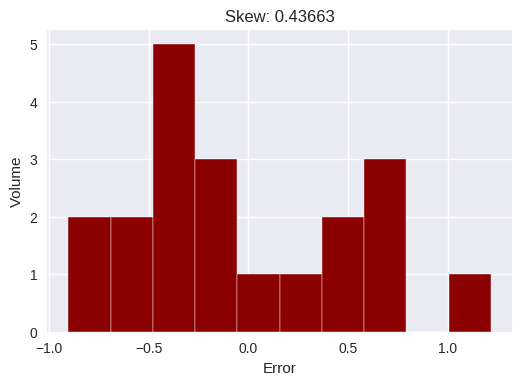

In [0]:
# Store the training predictions
top.insert(2, 'team_rank_p', fit4.fittedvalues, True)

# Plot the test residuals and RMSE
RMSE_str = 'RMSE: {}'.format(round(np.sqrt(np.mean((top['team_rank'] - top['team_rank_p'])**2)), 5))
plt.figure(figsize = (6, 4), dpi = 100)
plt.scatter(top['team_rank'], top['team_rank_p'], c = 'darkred')
plt.xlabel('Actual Value')
plt.ylabel('Predicted Value')
plt.title(RMSE_str)
plt.show()
print('\n\n')

# Distribution of errors
err = top['team_rank'] - top['team_rank_p']
err_str = 'Skew: {}'.format(round(err.skew(axis = 0, skipna = True), 5))
plt.figure(figsize = (6, 4), dpi = 100)
plt.hist(x = err, color = 'darkred')
plt.xlabel('Error')
plt.ylabel('Volume')
plt.title(err_str)
plt.show()

## CONCLUSION

<p align = 'justify'><font size="2.5" face="verdana"><br><sup>6</sup>In Sports, Analytics has gone beyond just tracking data on paper and gaining actionable insights. Today real-time videos are used for the purpose of finding key analysis points. Making use of player tracking, analytics companies can provide performance metrics about players. <p align = 'justify'><font size="2.5" face="verdana"><br>Supported by the availability of data and through various statistical and Machine Learning techniques, the analysis shown above has proven that it is possible to find patterns and correlations within a dataset as well as go on ahead and make various predictions. These Insights can help ease the decision-making process of businesses in any industry.<p align = 'justify'><font size="2.5" face="verdana"><br> It can be used to determine whether to sell a product to a customer and when using recommendation systems, Supervised Machine Learning Techniques like Classification can be used to predict whether a player will make a shot or not, Regression algorithms can be used to predict the potential salary of a coach as well as provide insight into what contributes to a coaches salary and finally, un- supervised techniques like clustering can be used in banking to learn more about customers who behave similarly in order to solution for them appropriately.  When properly used, these techniques can eventually lead to an increase in profits, a reduction in costs and a change in processes. </br></p>


6. https://dataconomy.com/2018/08/here-is-everything-you-want-to-know-about-sports-analytics/